# this code is analysis of experiment using code built with positive control data
[I used simulation data for two systems. In both the Smad pathway is simulated identically, with random noise in parameters and protein expression. The differene in the two systems is that in system 1, [gene = f(Smad3/4)], target gene expression depends directly on nuclear Smad3/Smad4, and in system 2, [gene = f(Smad3/4 , X)] target gene expression depends on nuclear Smad3/Smad4 and a randomly varying other factor, X (which in this case is a factor that affects how strongly Smad3/4 induces gene expression.]

From the simulated data, I use full trajectories for the level nuclear Smad3--that is the concentration of all species of Smad3 in the nucleus, such as would be observed in a microscope. (Note, I am not using trajectories for Smad3/Smad4 complex, which is the actual molecular complex on which gene production depends. I do not use these trajectories because they are not measurable in cells). Second, I use full trajectories of target gene production. For gene expression I analyze either A) a gene whose production depends directly on Smad3/Smad4 binding, or B) a gene whose production depends on a small network motif (3-nodes total, I-FFL1 specifically) that causes production of gene to be proportional to the fold-change in Smad3/Smad4 complex.

For experimental""" analysis, I take trajectories of nuclear NG-Smad3, which were measured in single cells from experiments and I take trajectories of total nuclear Snail:mCherry (or median, see next experiment). I first run diffusion maps on the NG-Smad3 trajectories to obtain a good DMAP for NG-Smad3. Then I obtain a DMAP for Snail using the same method. Then I use Gaussian Process Regression to assess whether Snail dynamics (i.e. Snail DMAP) can be predicted using Smad3 dynamics (i.e. Snail DMAP). 

In order to obtain a good diffusion map, I prepare (process?) the original data in the following way.
1. First, I take raw data as is. This is matrix1. (Matrix1 is M cells X N timepoints)
2. Then I take the raw data and compute the derivative of each trajectory. This is matrix 2. 
3. Then I take the raw data and compute the integral of each trajectory. This is matrix 3. 
4. Then I combine matrices 1, 2 and 3 into one new matrix, MatrixCAT (MatrixCAT is M cells X 3*N timepoints)
5. Then I transform this data set (in a way the preserves the topology of the data set) by normalizing all trajectories at each time point using the following:
    MT = MatrixCAT[t,:] (t=1)
    [MT is an 1 x M array, where M is the number of cells]
    MTn = MT-min(MT)/(max(MT)-min(MT)
    MTns = sqrt(MTn)
    MatrixCATztos[t,:] = MTns
    [I do this for all timepoints]
6. This transformation preserves topology, and it ensures that the difussion distances are similar for each dimension, which is important for finding a good difussion kernel for the diffusion map algoritm. 
7. By including raw data, first derivative of data, and integral of data were are enableing the algorithm to find a difussion Map that uncovers the dynamical features of the data set. 





# below this is the one value you must change if you change how this code runs

In [1]:
#epscale paramters
#num_evecs
#peakfindercutoff

#epsilon search parameters
num_eps = 50
eL = 1.2
eH = 4

evecs_cut = True
num_evecs=30

sampiter = 20 #number of times to iterate through Local linear regression
subsampfactor = 8 #scale at which to subsample data for LLR # subsampsize = np.ceil(datasize/subsampfactor)
subsampmax = 500 # never run LLR for more than 500 data pts; it will fail

reducedimval = 50
promval = 0.05 #defines prominence of peaks at which to threshold

In [2]:
# specid = 'EXP_S3conc_SNAILconc_gpy_LLRpeakfinder-AGNOSTIC-ztosqrtResample'
specid = 'agnostic-AGI-zto_numeps'+str(num_eps)+'-'+str(eL)+'-'+str(eH)+'_rdimval'+str(reducedimval)+'_n-evecs'+str(num_evecs)+'cut-'+str(evecs_cut)+'_promval-'+str(promval)+'_SI-'+str(sampiter)+'_subsampF'+str(subsampfactor)+'_sampmax'+str(subsampmax)  
print(specid)

agnostic-AGI-zto_numeps50-1.2-4_rdimval50_n-evecs30cut-True_promval-0.05_SI-20_subsampF8_sampmax500


/Users/frick/Dparams/DParamsFinal_v5
16  runs to perform
using ein
using ein
csvsub1 exp3-SMAD-median
ev_in =  [1, 3, 6]


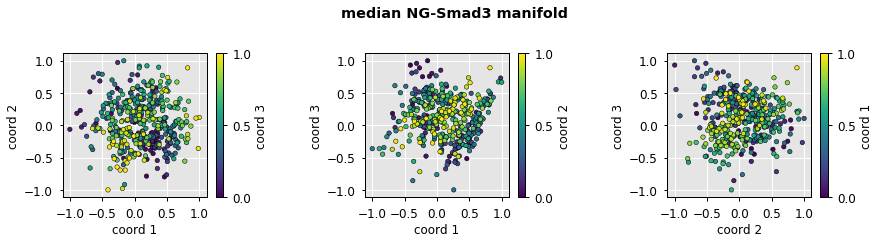

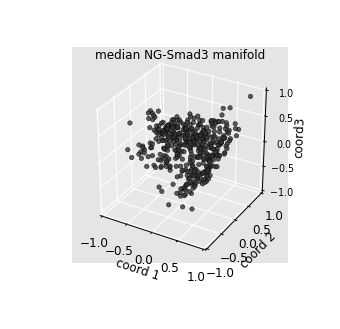

('exp3', 'GENE-total')
csvsub= 2  exp3-GENE-total
ev_out =  [1, 5]
3
2


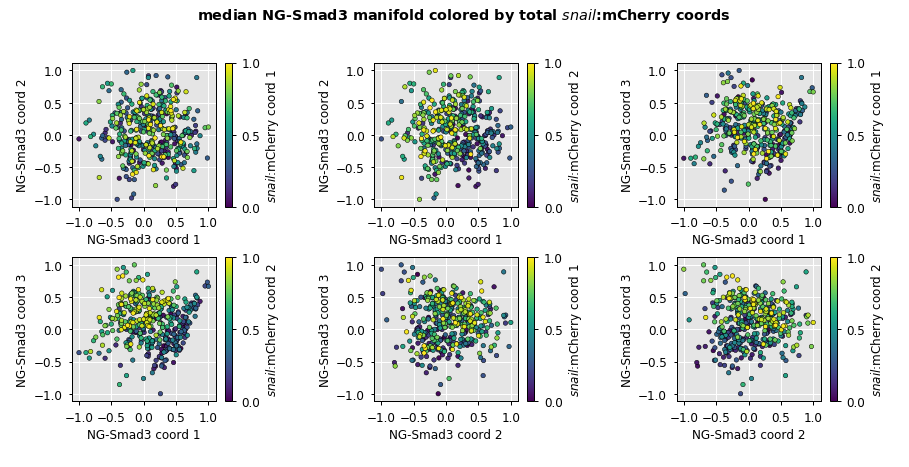

('exp3', 'GENE-median')
csvsub= 2  exp3-GENE-median
ev_out =  [1, 3]
3
2


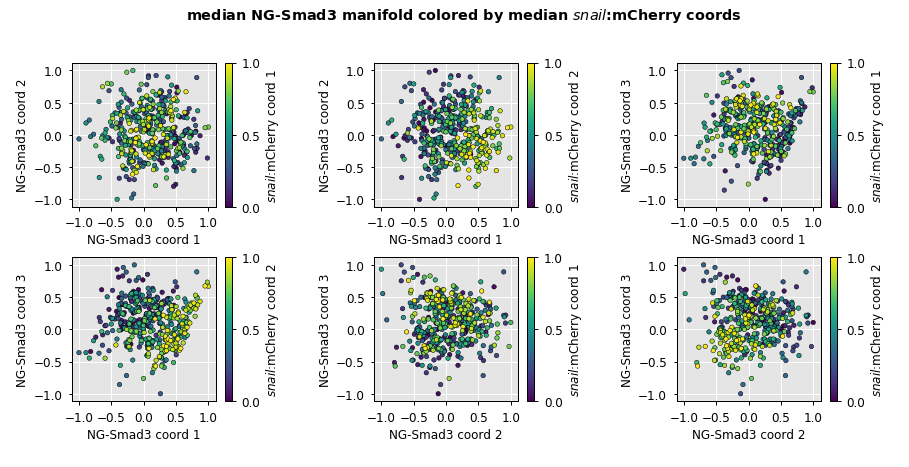

using ein
using ein
csvsub1 exp3-SMAD-total
ev_in =  [1, 4, 10]


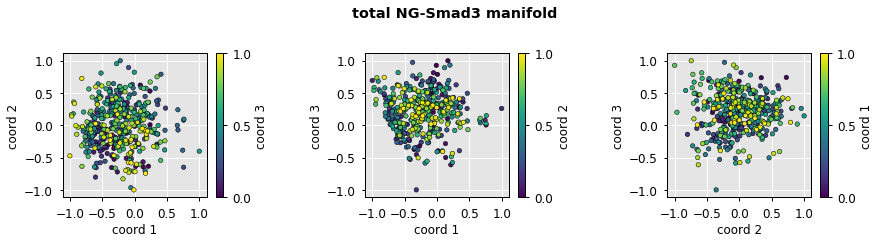

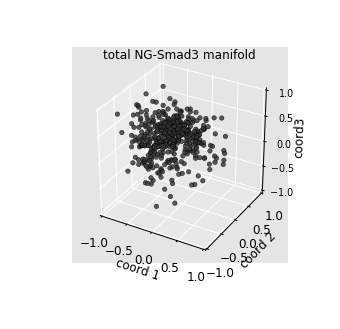

('exp3', 'GENE-median')
csvsub= 2  exp3-GENE-median
ev_out =  [1, 3]
3
2


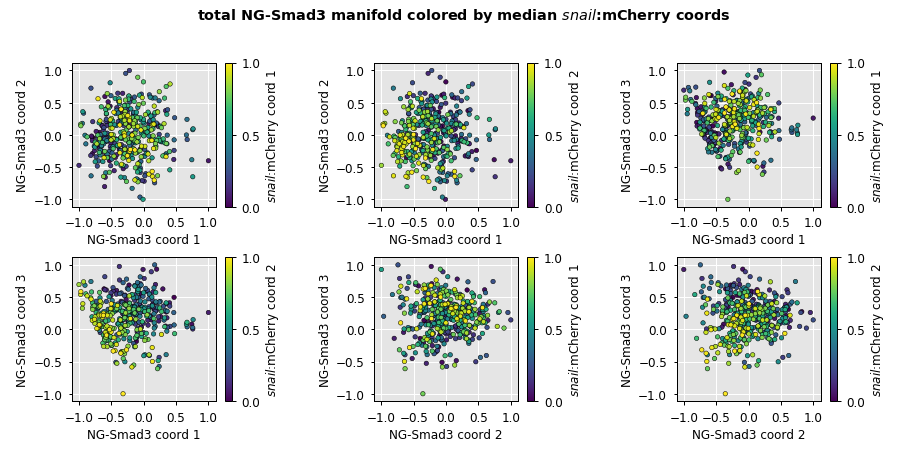

('exp3', 'GENE-total')
csvsub= 2  exp3-GENE-total
ev_out =  [1, 5]
3
2


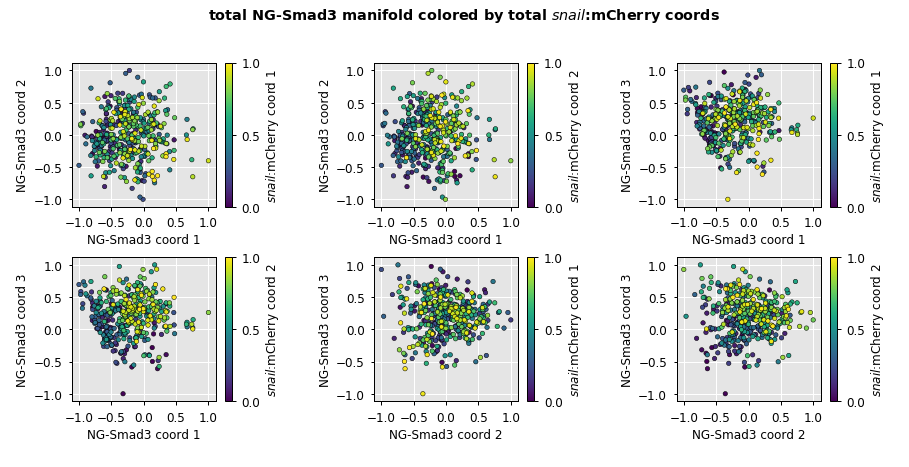

using ein
using ein
csvsub1 exp4-SMAD-median
ev_in =  [1, 3, 7]


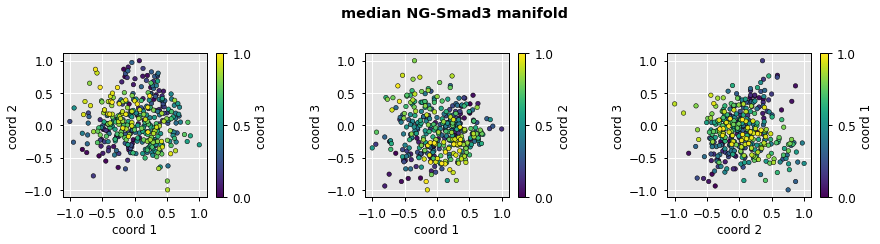

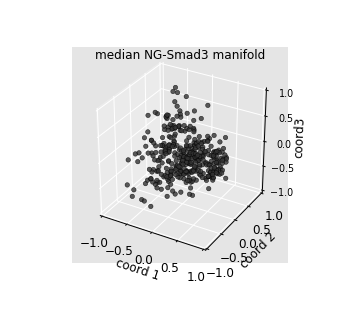

('exp4', 'GENE-total')
csvsub= 2  exp4-GENE-total
ev_out =  [1, 4]
3
2


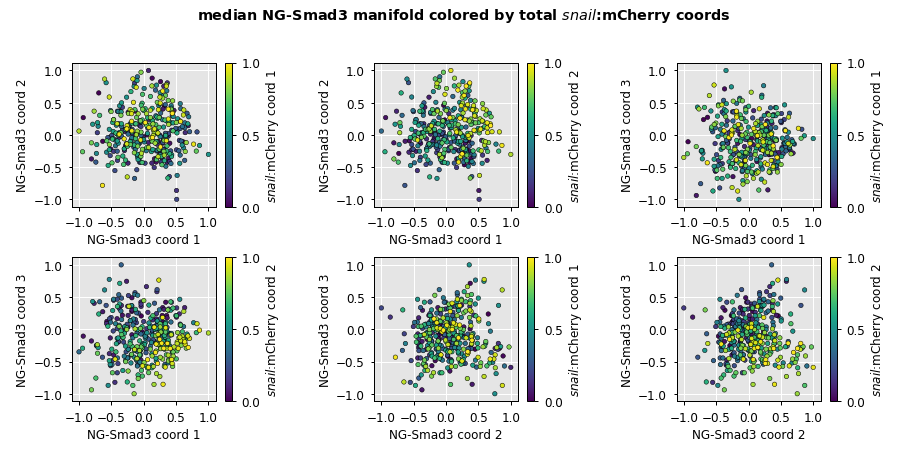

('exp4', 'GENE-median')
csvsub= 2  exp4-GENE-median
ev_out =  [1, 4]
3
2


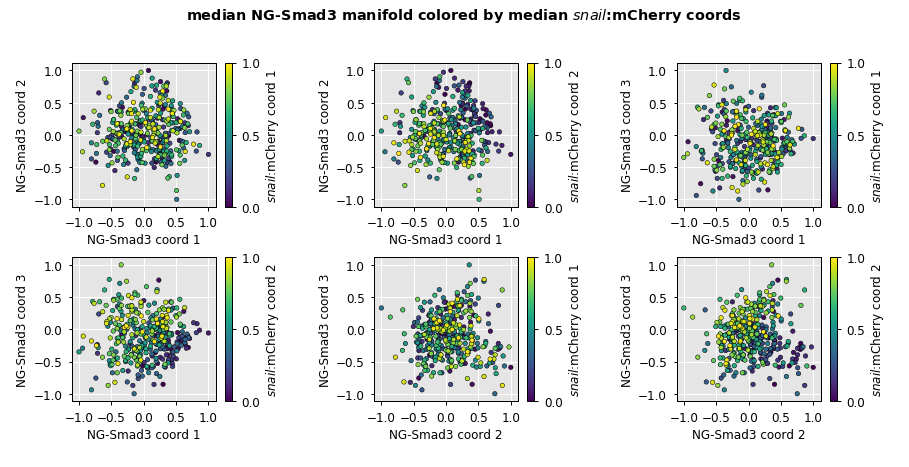

using ein
using ein
csvsub1 exp4-SMAD-total
ev_in =  [1, 6, 11]


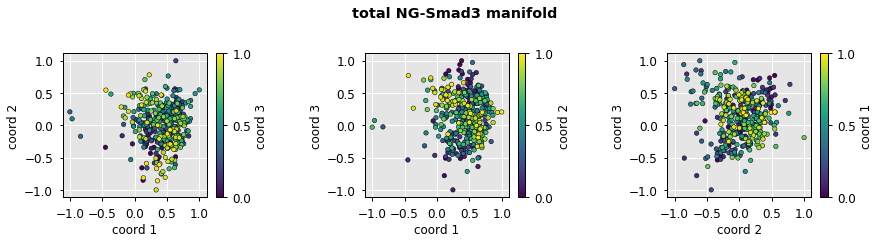

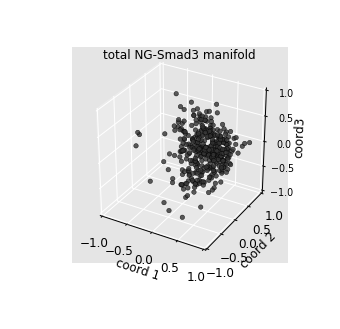

('exp4', 'GENE-total')
csvsub= 2  exp4-GENE-total
ev_out =  [1, 4]
3
2


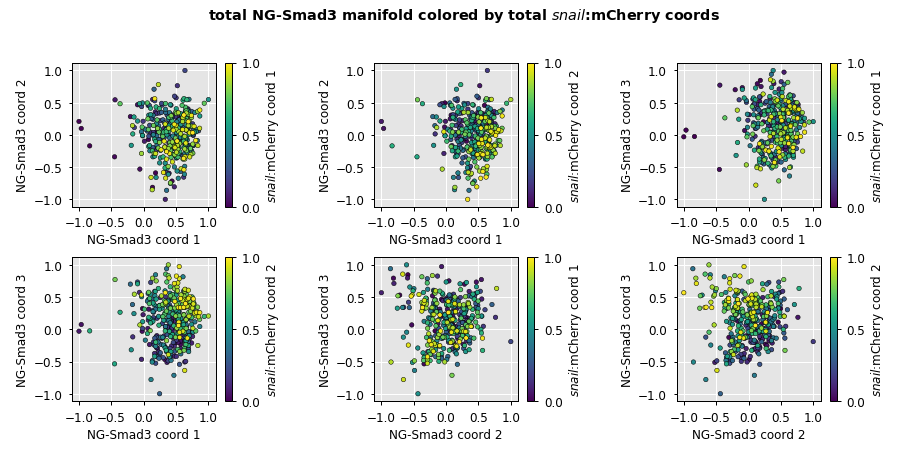

('exp4', 'GENE-median')
csvsub= 2  exp4-GENE-median
ev_out =  [1, 4]
3
2


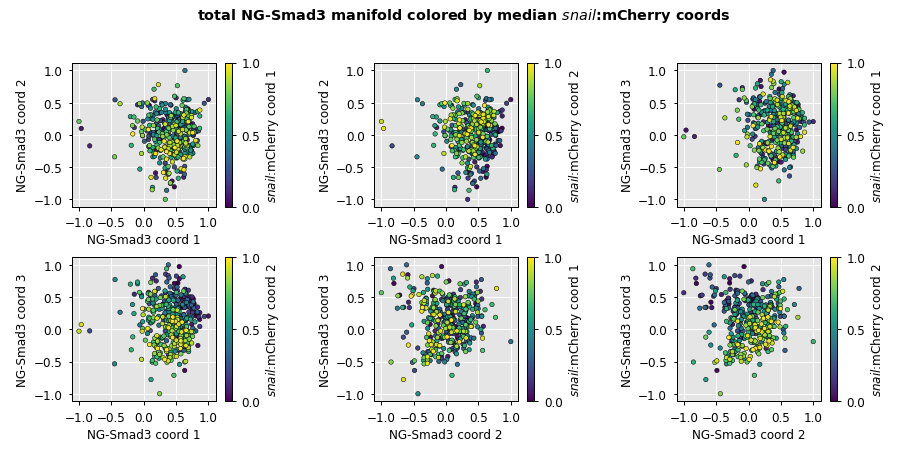

using eout
using eout
csvsub1 exp3-GENE-median
ev_in =  [1, 3]


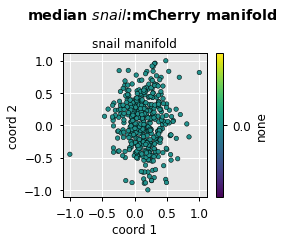

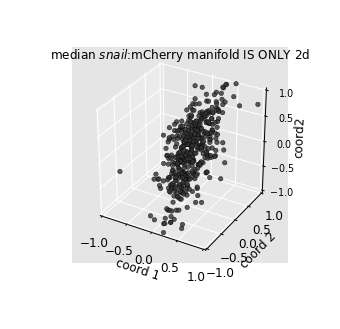

('exp3', 'SMAD-total')
csvsub= 2  exp3-SMAD-total
ev_out =  [1, 4, 10]
1
3


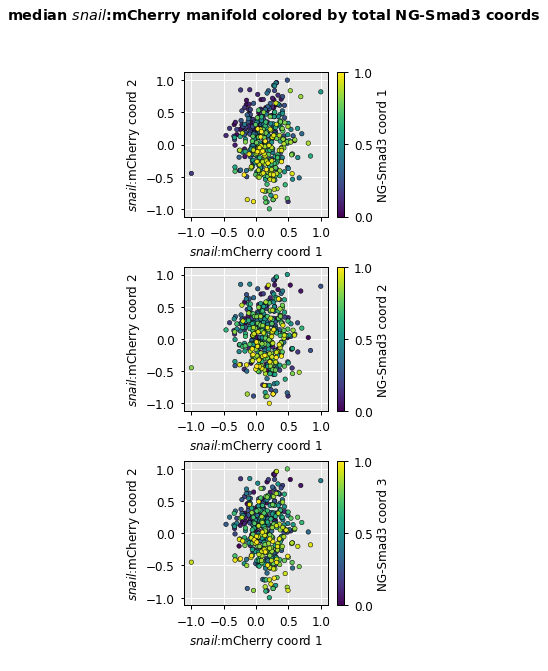

('exp3', 'SMAD-median')
csvsub= 2  exp3-SMAD-median
ev_out =  [1, 3, 6]
1
3


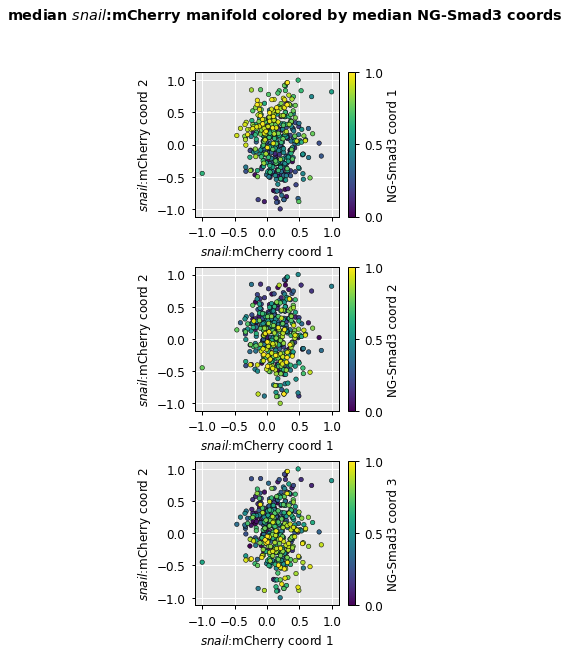

using eout
using eout
csvsub1 exp3-GENE-total
ev_in =  [1, 5]


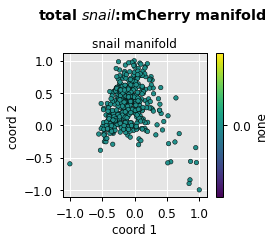

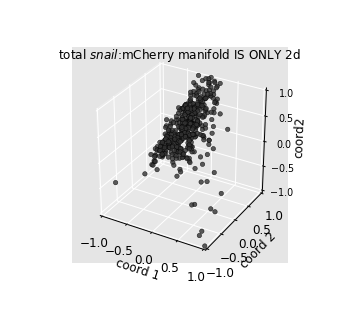

('exp3', 'SMAD-median')
csvsub= 2  exp3-SMAD-median
ev_out =  [1, 3, 6]
1
3


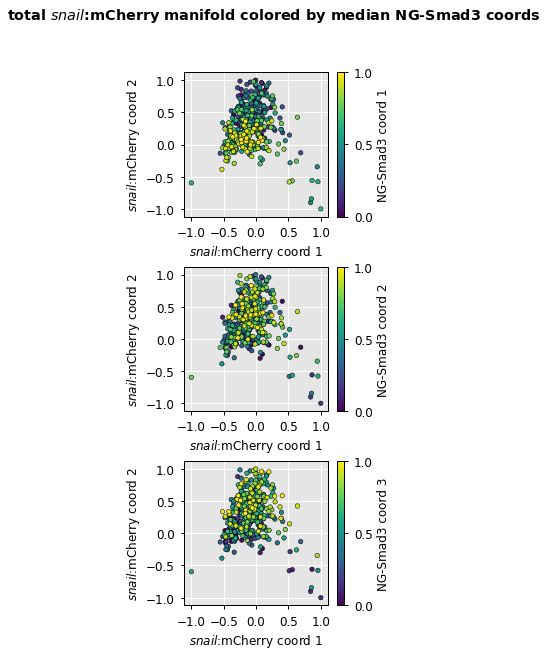

('exp3', 'SMAD-total')
csvsub= 2  exp3-SMAD-total
ev_out =  [1, 4, 10]
1
3


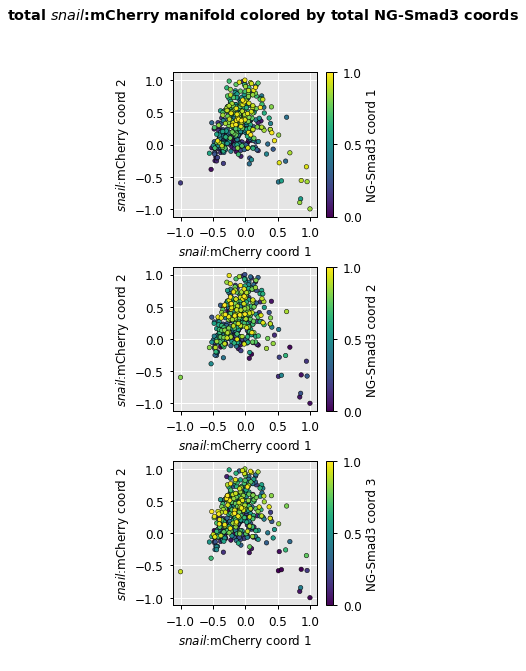

using eout
using eout
csvsub1 exp4-GENE-median
ev_in =  [1, 4]


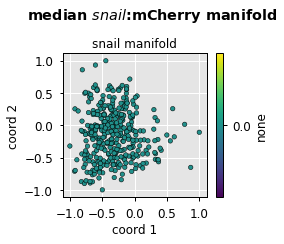

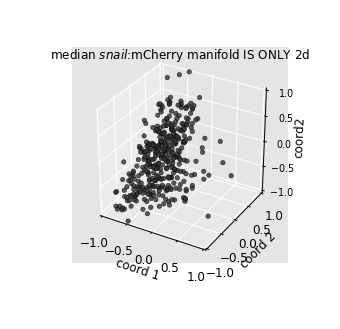

('exp4', 'SMAD-median')
csvsub= 2  exp4-SMAD-median
ev_out =  [1, 3, 7]
1
3


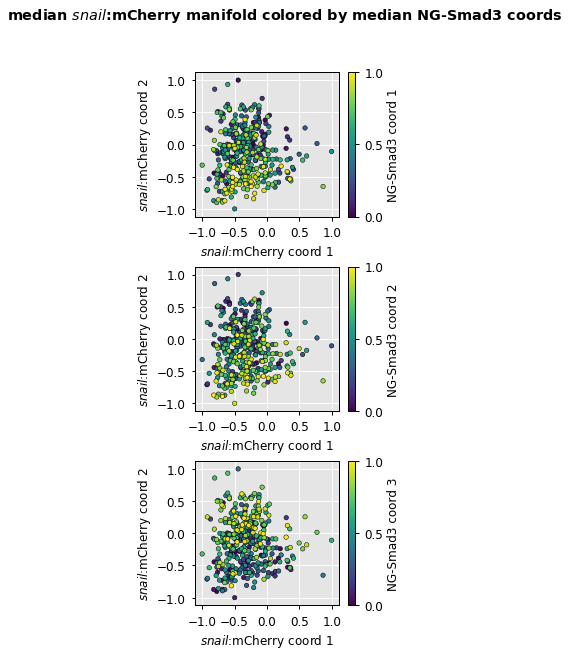

('exp4', 'SMAD-total')
csvsub= 2  exp4-SMAD-total
ev_out =  [1, 6, 11]
1
3


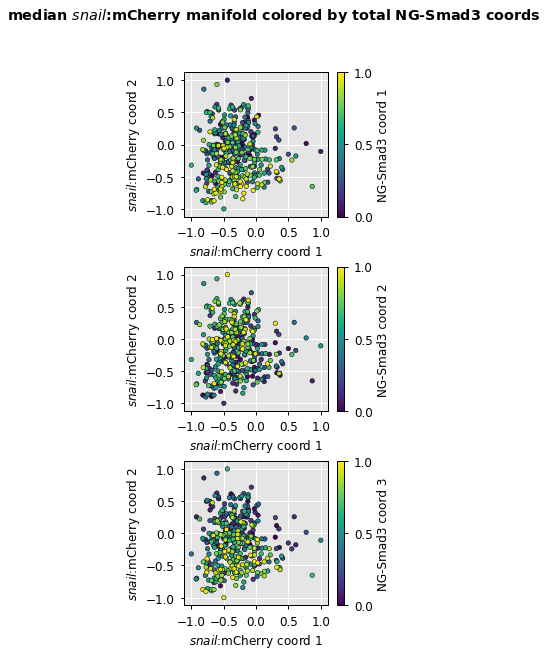

using eout
using eout
csvsub1 exp4-GENE-total
ev_in =  [1, 4]


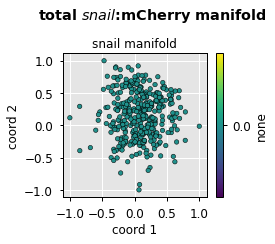

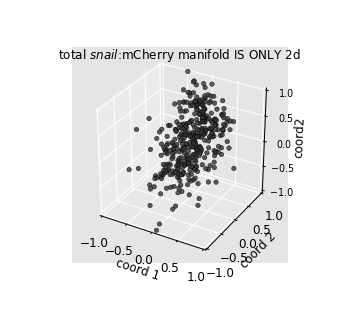

('exp4', 'SMAD-median')
csvsub= 2  exp4-SMAD-median
ev_out =  [1, 3, 7]
1
3


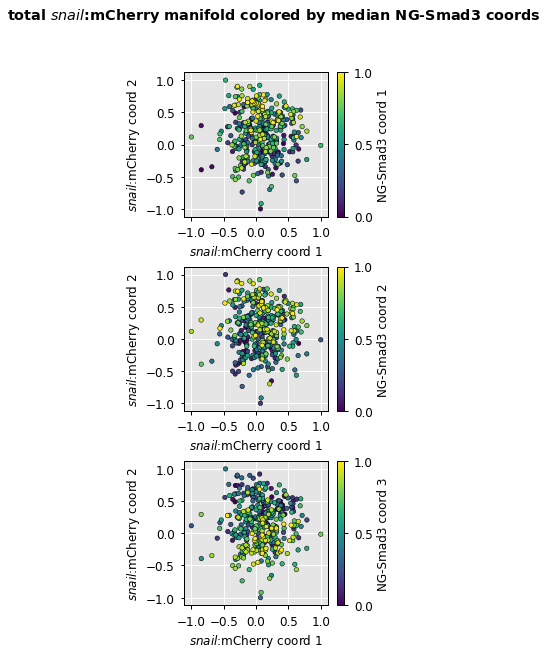

('exp4', 'SMAD-total')
csvsub= 2  exp4-SMAD-total
ev_out =  [1, 6, 11]
1
3


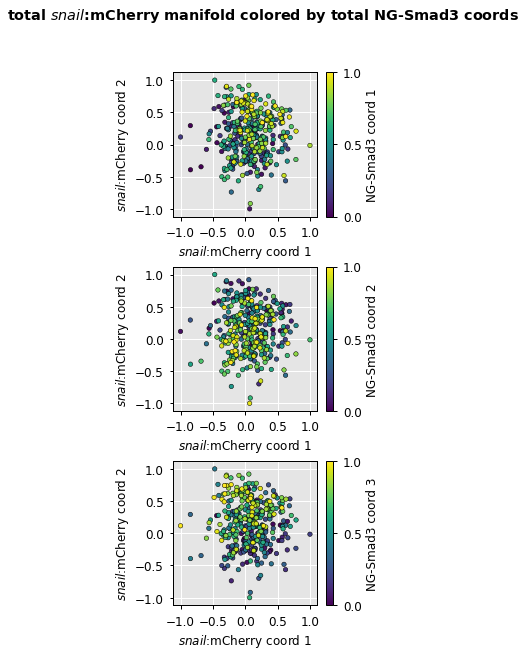

using ein
using ein
using ein
using ein
using ein
using ein
csvsub1 exp-SMAD-rsmad
ev_in =  [1, 4, 9]


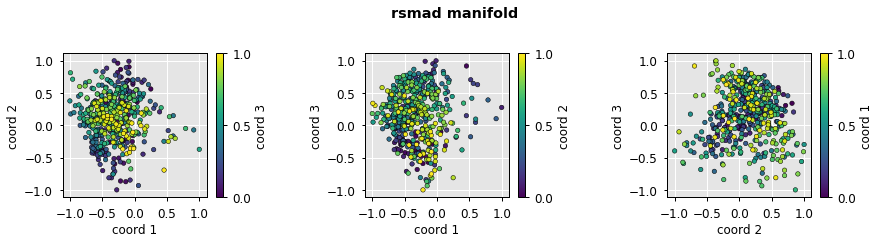

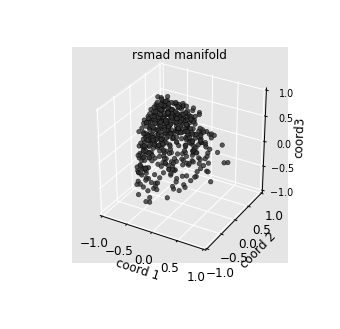

('expSYST3_PC', 'GENE-caga')
csvsub= 2  expSYST3_PC-GENE-caga
ev_out =  [1, 4]
3
2


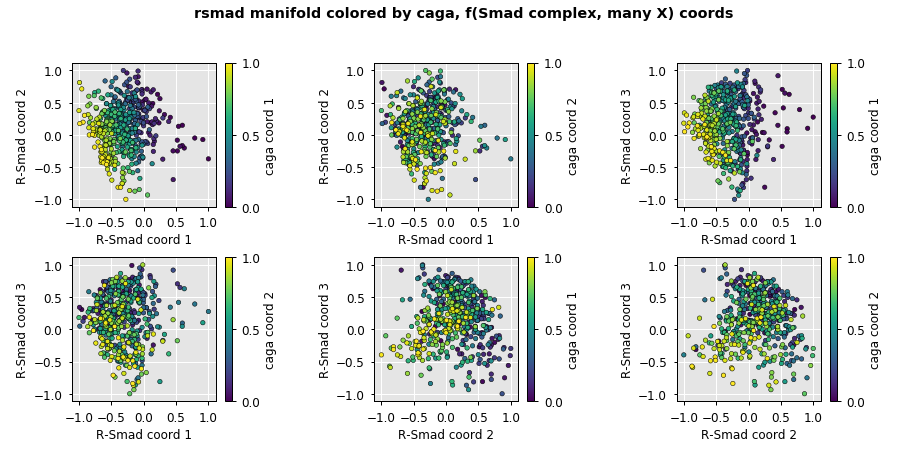

('expSYST1_PC', 'GENE-iffl')
csvsub= 2  expSYST1_PC-GENE-iffl
ev_out =  [1, 3, 8]
3
3


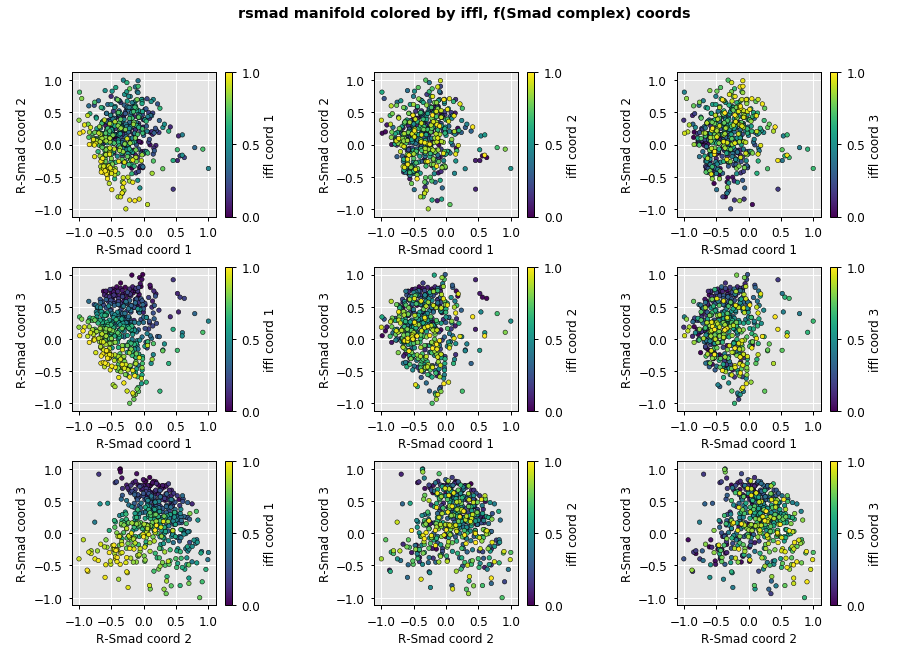

('expSYST2_PC', 'GENE-caga')
csvsub= 2  expSYST2_PC-GENE-caga
ev_out =  [1, 5]
3
2


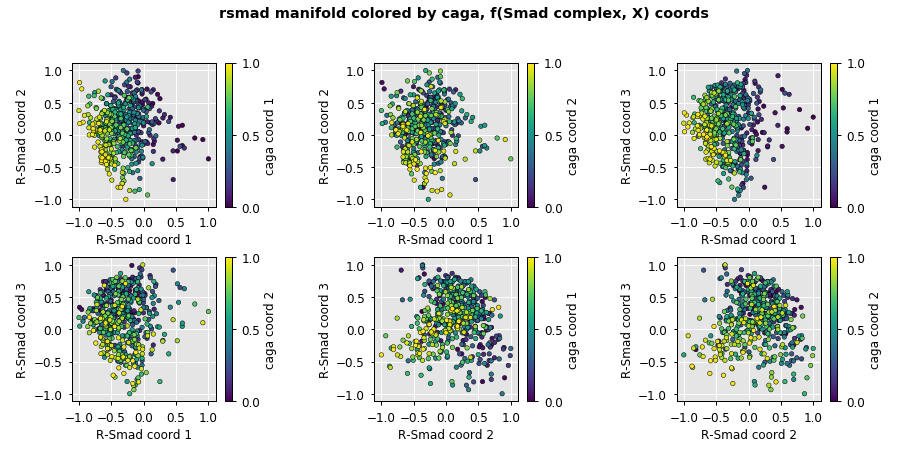

('expSYST1_PC', 'GENE-caga')
csvsub= 2  expSYST1_PC-GENE-caga
ev_out =  [1, 3]
3
2


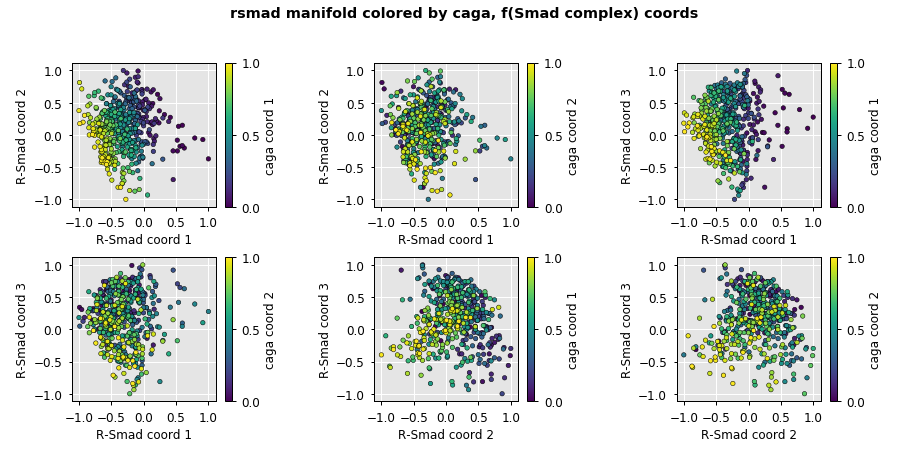

('expSYST3_PC', 'GENE-iffl')
csvsub= 2  expSYST3_PC-GENE-iffl
ev_out =  [1, 3, 8]
3
3


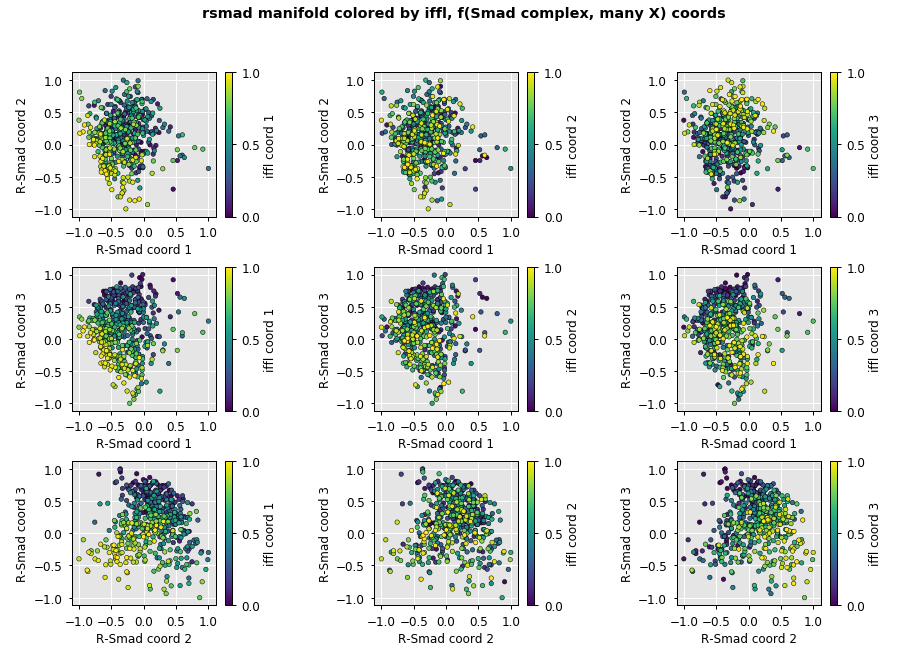

('expSYST2_PC', 'GENE-iffl')
csvsub= 2  expSYST2_PC-GENE-iffl
ev_out =  [1, 4]
3
2


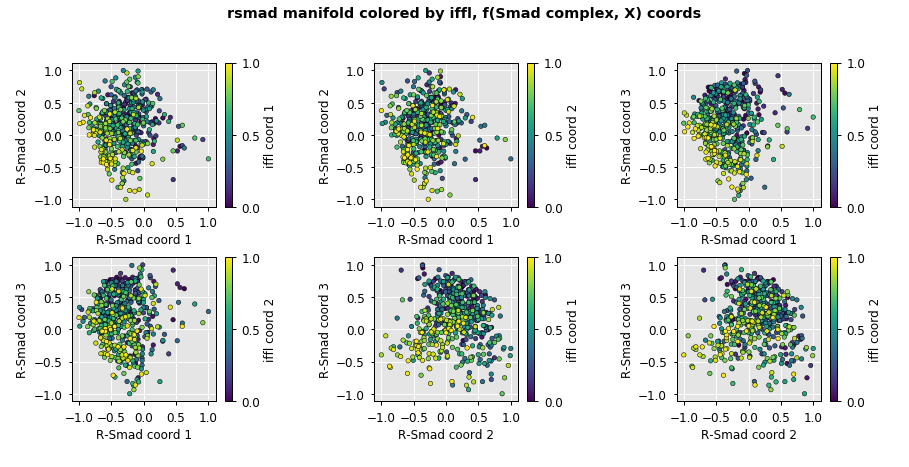

using ein
using ein
using ein
using ein
using ein
using ein
csvsub1 exp-SMAD-complex
ev_in =  [1, 3]


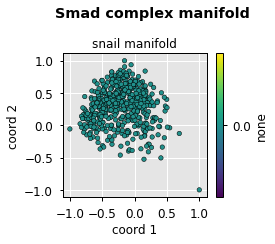

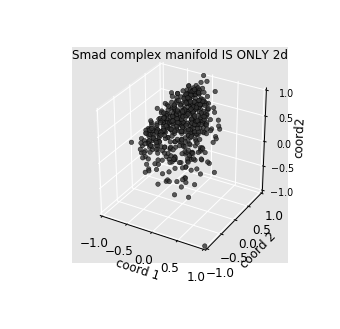

('expSYST2_PC', 'GENE-caga')
csvsub= 2  expSYST2_PC-GENE-caga
ev_out =  [1, 5]
1
2


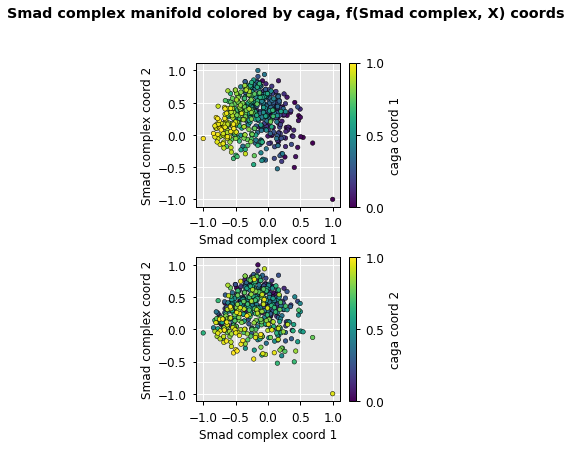

('expSYST1_PC', 'GENE-caga')
csvsub= 2  expSYST1_PC-GENE-caga
ev_out =  [1, 3]
1
2


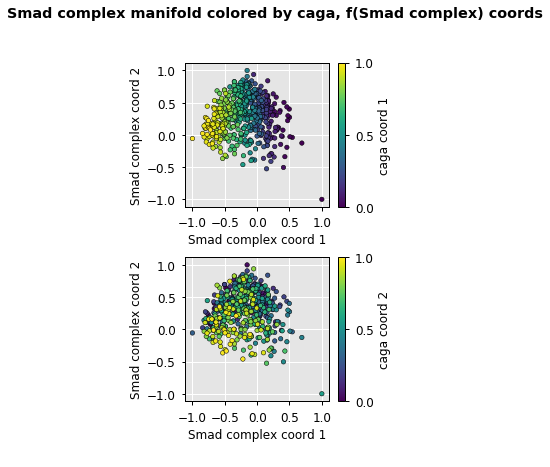

('expSYST3_PC', 'GENE-iffl')
csvsub= 2  expSYST3_PC-GENE-iffl
ev_out =  [1, 3, 8]
1
3


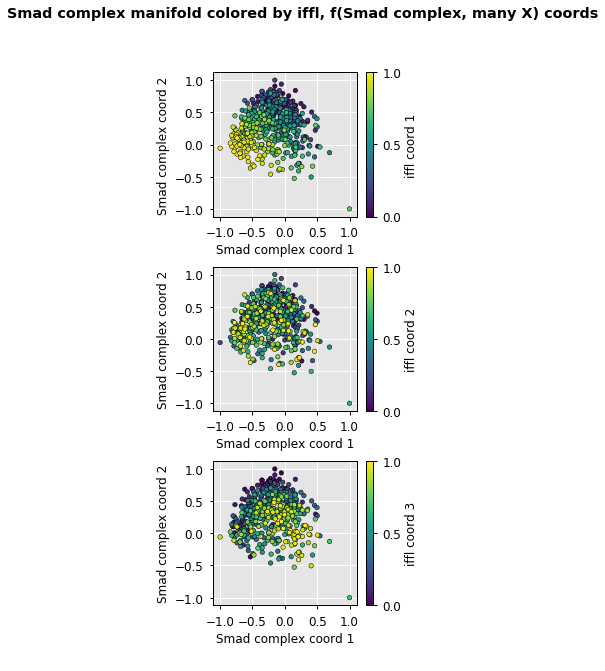

('expSYST2_PC', 'GENE-iffl')
csvsub= 2  expSYST2_PC-GENE-iffl
ev_out =  [1, 4]
1
2


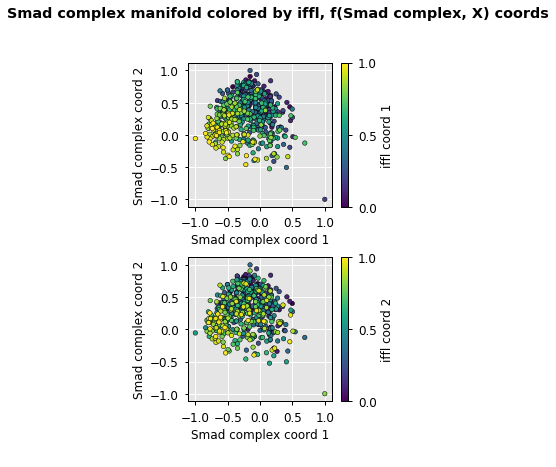

('expSYST1_PC', 'GENE-iffl')
csvsub= 2  expSYST1_PC-GENE-iffl
ev_out =  [1, 3, 8]
1
3


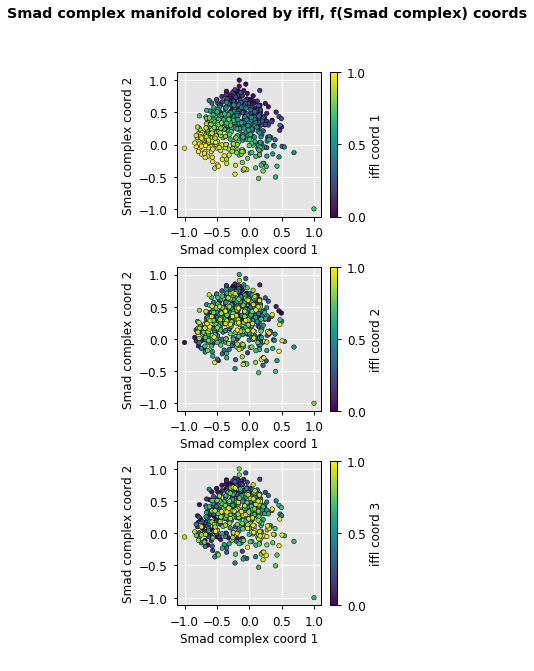

('expSYST3_PC', 'GENE-caga')
csvsub= 2  expSYST3_PC-GENE-caga
ev_out =  [1, 4]
1
2


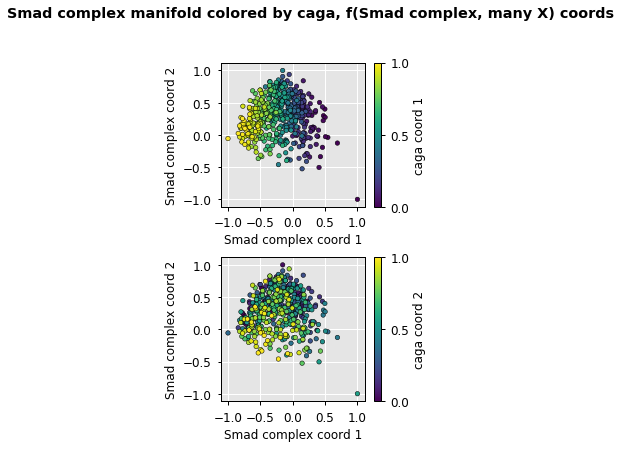

using eout
using eout
csvsub1 expSYST1_PC-GENE-iffl
ev_in =  [1, 3, 8]


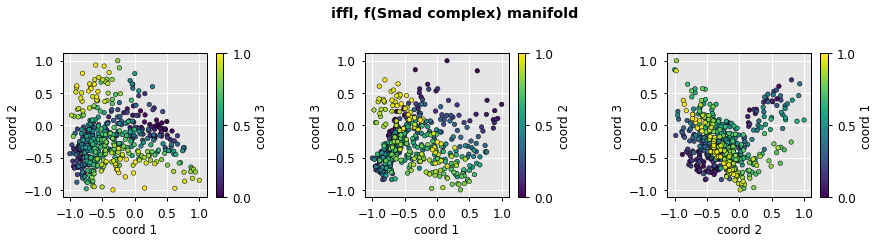

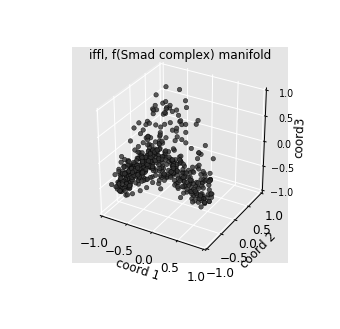

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
3
3


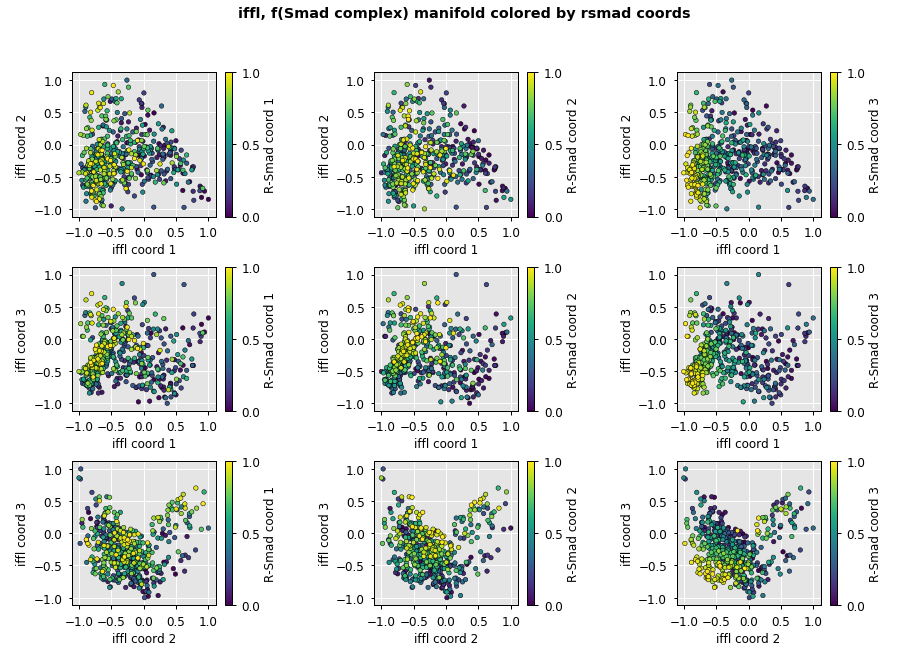

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
3
2


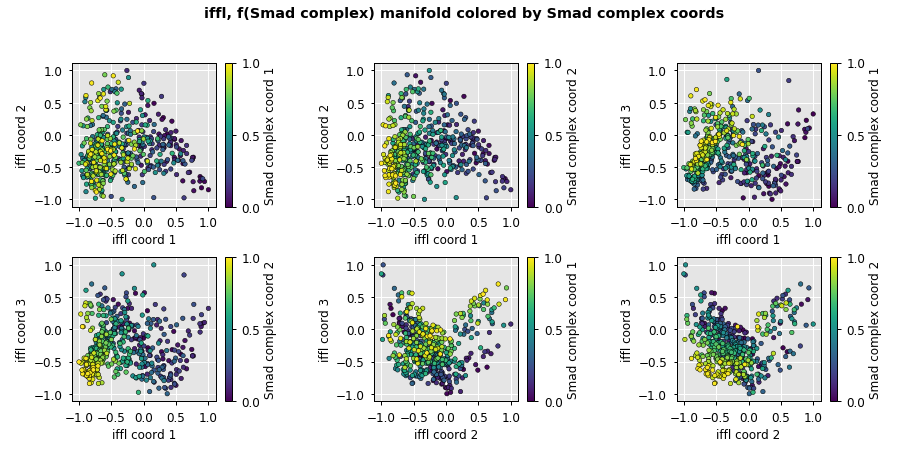

using eout
using eout
csvsub1 expSYST1_PC-GENE-caga
ev_in =  [1, 3]


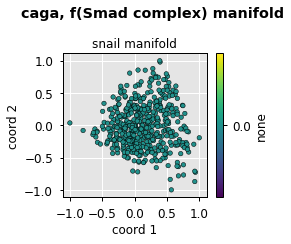

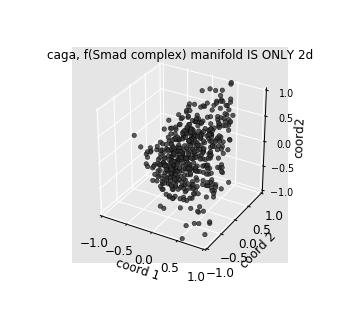

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
1
2


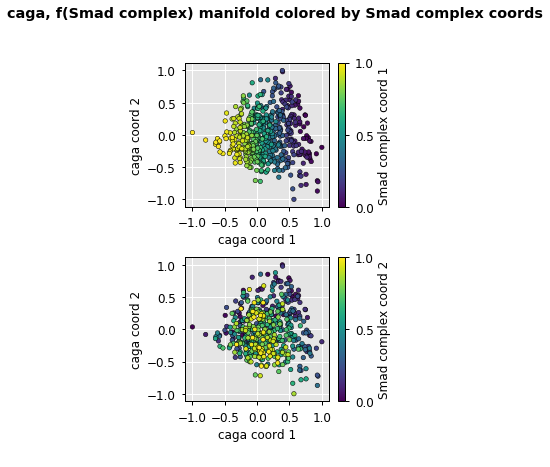

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
1
3


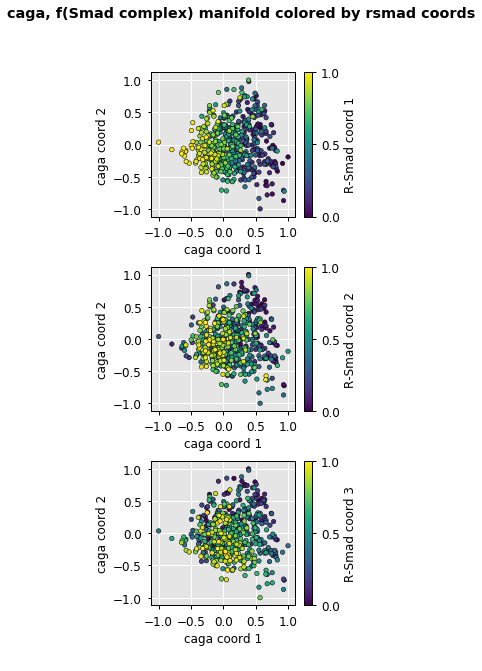

using eout
using eout
csvsub1 expSYST2_PC-GENE-iffl
ev_in =  [1, 4]


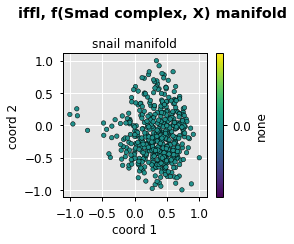

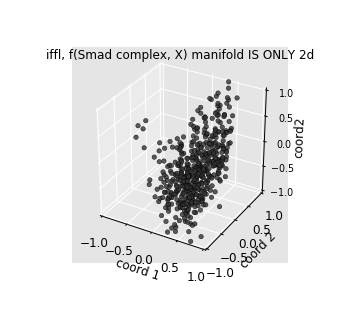

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
1
2


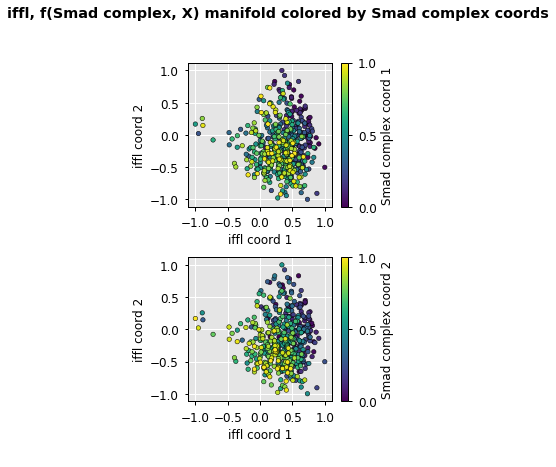

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
1
3


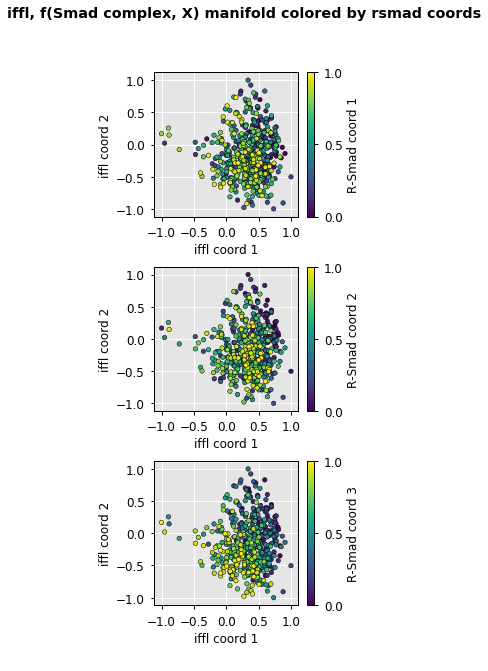

using eout
using eout
csvsub1 expSYST2_PC-GENE-caga
ev_in =  [1, 5]


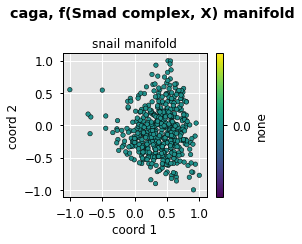

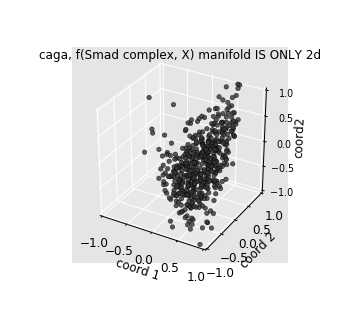

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
1
2


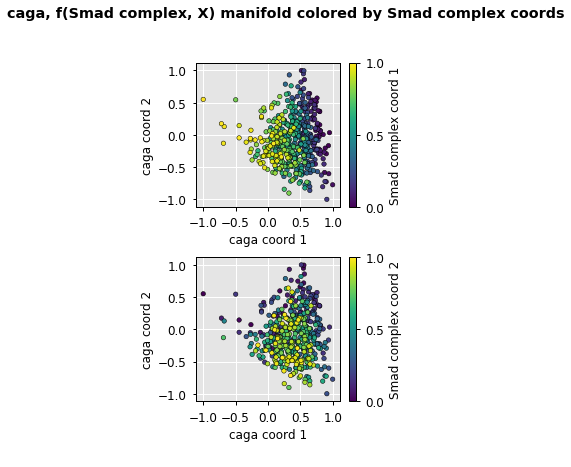

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
1
3


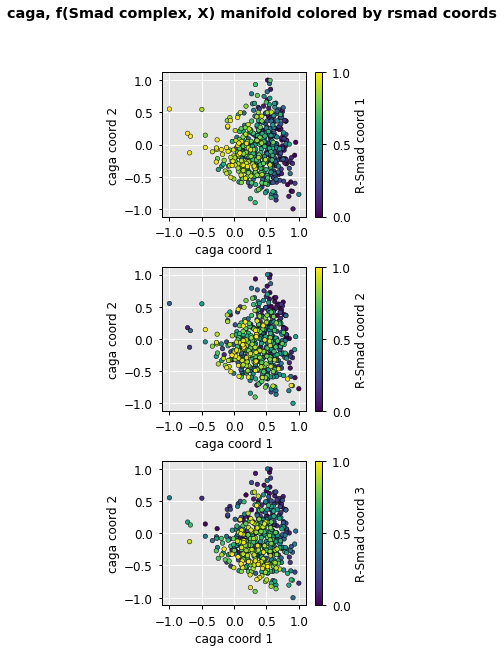

using eout
using eout
csvsub1 expSYST3_PC-GENE-iffl
ev_in =  [1, 3, 8]


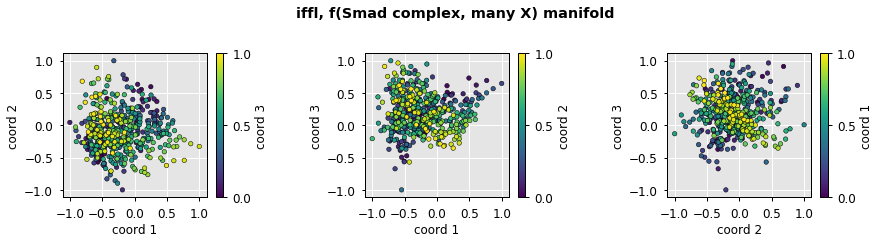

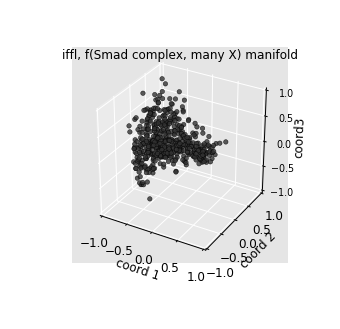

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
3
2


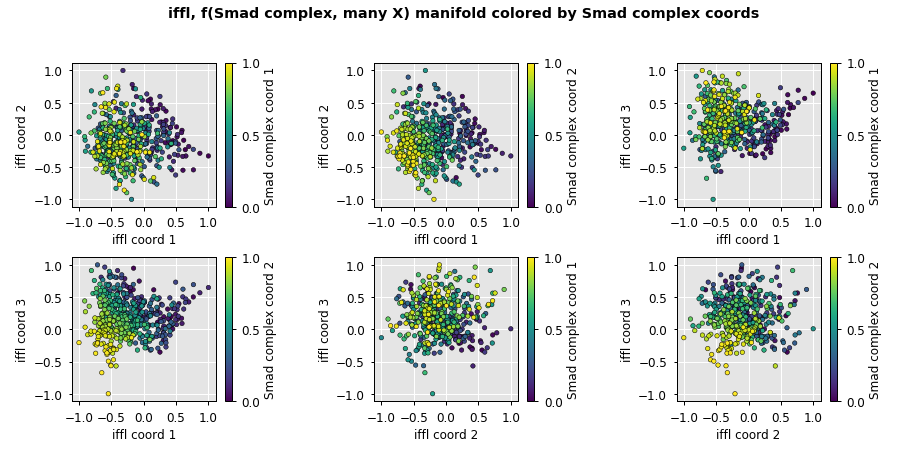

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
3
3


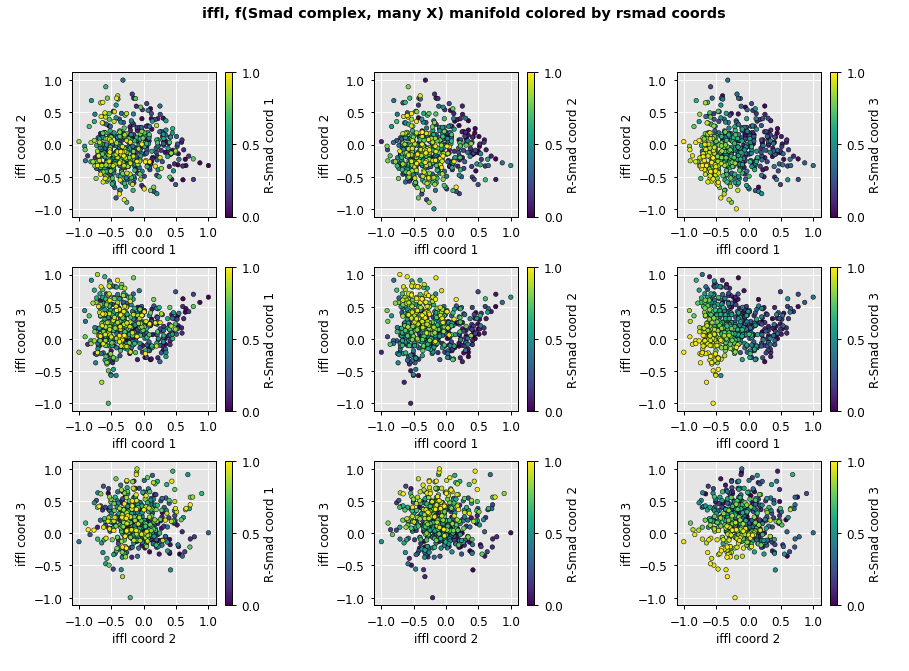

using eout
using eout
csvsub1 expSYST3_PC-GENE-caga
ev_in =  [1, 4]


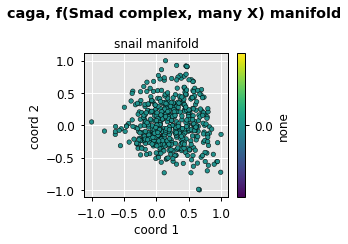

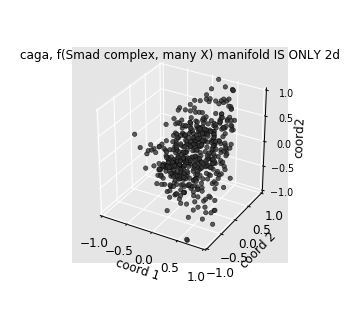

('exp', 'SMAD-rsmad')
csvsub= 2  exp-SMAD-rsmad
ev_out =  [1, 4, 9]
1
3


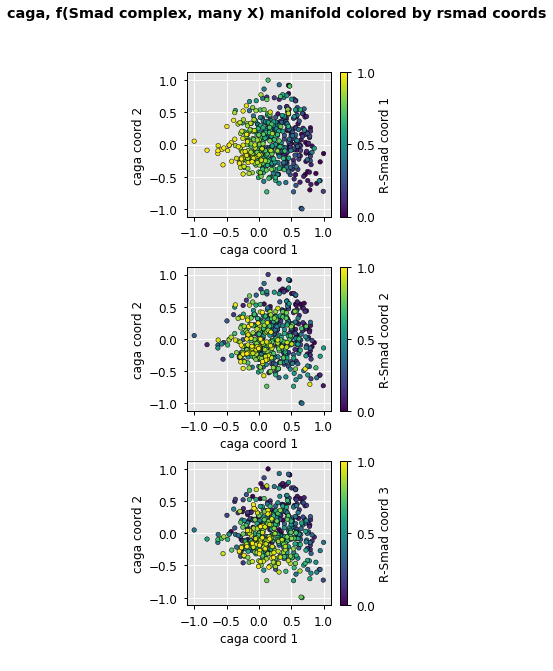

('exp', 'SMAD-complex')
csvsub= 2  exp-SMAD-complex
ev_out =  [1, 3]
1
2


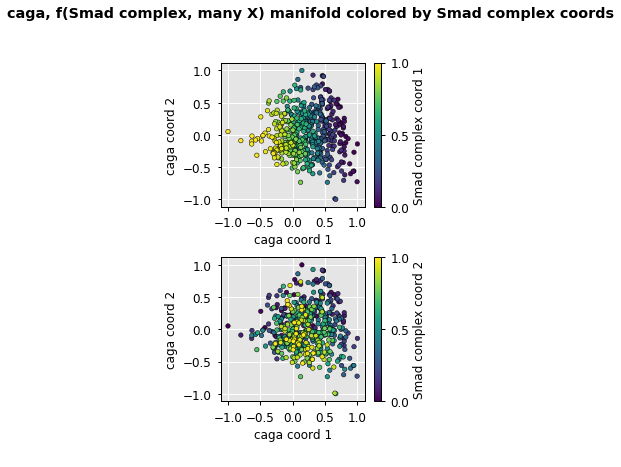

In [10]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import numpy as np

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode

import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal
import itertools 
import re

from dmap_sp_chrisNEW import *
import os

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
    
from accessory import *


specidpath = specid.replace(".", "dot")

repo = str(cwd) +'/'

# ########################  IMPORT   ############################
import dill as pickle;
#     from pathlib import Path



session_savepath =  specidpath + '/'
session_path = repo + session_savepath

#     print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    error('incoddrect directory')




filenames = list()
for file in os.listdir(session_path):
    if file.endswith("pickle"):
        if bool(re.search('SMAD-rsmad',file)):
            filenames = filenames + list([file])
#             print(os.path.join(session_path,file))
#             filenames = filenames + list(str((os.path.join(session_path,file))))




a = ['exp3','exp4']
b = ['SMAD-median','SMAD-total']
c = ['GENE-median','GENE-total']
expSMAD = list(itertools.product(a,b))
expSNAIL = list(itertools.product(a,c))

a1 = ['exp']
b = ['SMAD-rsmad','SMAD-complex']
simSMAD = list(itertools.product(a1,b))

a2 = ['expSYST1_PC','expSYST2_PC','expSYST3_PC']
c = ['GENE-iffl','GENE-caga']
simGENE = list(itertools.product(a2,c))



dall = expSMAD + expSNAIL + simSMAD + simGENE
print(len(dall), ' runs to perform')
for dd in dall:

############ this block of loads best manifold ########################  


#     checkstr1 = 'exp'
#     checkstr2 = 'SMAD-rsmad'
    checkstr1 = dd[0]
    checkstr2 = dd[1]
    filenames = list()
    for file in os.listdir(session_path):
        if file.endswith("pickle"):
            if (bool(re.search(checkstr1,file)) & (bool(re.search(checkstr2,file)))):
                filenames = filenames + list([file])   

  

    file = filenames[0]
    pickle.load_session(session_path + file)
    accuracyMatrix = np.zeros((len(filenames),accvali2.shape[1]))
    
    
    cycle=-1
    gooddimsall=list()
    evecs_evals_dim_keep = {}
    for file in filenames:
        cycle=cycle+1
        pickle.load_session(session_path + file)
        cyv = cycle
        accy = accvali2.copy()
        accuracyMatrix[cyv,:] = accy[0,:]
        gooddims = list(accstri22[0].values())
        gooddimsall = gooddimsall + [gooddims]
        if bool(re.search('SMAD',checkstr1+checkstr2)):
            evecs_evals_dim_keep[cycle]=ein
            print('using ein')
        else:
            evecs_evals_dim_keep[cycle]=eout
            print('using eout')
                

        
    



    macc = np.mean(accuracyMatrix,axis=0)
    yerrup = np.percentile(accuracyMatrix,95,axis=0) - macc
    yerrdown = macc - np.percentile(accuracyMatrix,5,axis=0)
    x = np.asarray(range(len(macc)))
    y = macc.copy()
    yerr = np.vstack((yerrdown,yerrup))
    
    

    #determine best accuracy best, just based on best accuracy
    ymin = np.min(y)
    yminloc = np.argmin(y)

    
    iterationWithMin = np.argmin(accuracyMatrix[:,yminloc])
    dimensionsWithMin = gooddimsall[iterationWithMin]
    gooddimension = dimensionsWithMin[yminloc]

    if bool(re.search(checkstr2,'GENE')):
        epsfact = epsfactout
    else:
        epsfact = epsfactin
        
        

    
 

    bestdmapcsv_savepath1 = str(cwd) + '/' + specidpath + '/' 
    
    csvsub1 = checkstr1 + '-' + checkstr2

    if not os.path.exists(bestdmapcsv_savepath1):
        error('no dir')
        
    bestdmapcsv_savepath2 = bestdmapcsv_savepath1 + 'csvfiles'+'/'
    
    if not os.path.exists(bestdmapcsv_savepath2):
        error('no dir')

#     print('')
#     print('loading here...', bestdmapcsv_savepath2)
#     print('')
#     print('loading ... ', csvsub,'-[identifier].csv')

 
    # #load the CSV files
    
    savepath  = bestdmapcsv_savepath2 + csvsub1  + '-'

    evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

    evecs_in = evecs_in_csv
    evals_in = evals_in_csv
    eps_in = eps_in_csv
    ev_in = [int(x) for x in ev_in_csv]
    print('csvsub1',csvsub1)
    print('ev_in = ', ev_in)
    
    def catchImportantWords(ss20):
        m = re.findall(r'SMAD|GENE|doubt', ss20, re.IGNORECASE)
        ss21 = m[0]

        if bool(re.search('GENE',ss21)):
            m = re.findall(r'caga|iffl|median|total|doubt', ss20, re.IGNORECASE)
            ss22 = str(m[0])
            ss2 = ss22
            newstrsub = ss2
            if bool(re.findall(r'median|total', ss22, re.IGNORECASE)):
                ss2 = ss22+' $\itsnail$:mCherry' 
                newstrsub = '$\itsnail$:mCherry' 
            if bool(re.findall(r'SYST1|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex)' 
                newstrsub = ss22
            elif bool(re.findall(r'SYST2|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex, X)' 
                newstrsub = ss22
            elif bool(re.findall(r'SYST3|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex, many X)' 
                newstrsub = ss22


        else:
            m = re.findall(r'rsmad|complex|median|total|doubt', ss20, re.IGNORECASE)
            ss22 = str(m[0])
            ss2 = ss22
            newstrsub = 'R-Smad'
            if bool(re.findall(r'median|total', ss22, re.IGNORECASE)):
                newstrsub = 'NG-Smad3'
                ss2 = ss22 +' NG-Smad3' 
            elif bool(re.findall(r'complex|doubt', ss22, re.IGNORECASE)):
                ss2 = 'Smad ' + ss22
                newstrsub = 'Smad complex'

        newstr = ss2
        return newstr,newstrsub


    def makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX,numY):


        wL = 0.5 #leftval in inches
        wR = 0.5 #rightval in inches
        hB = 0.5 #bottomval in inches
        hT = 0.5 #topval inches

        fW = wL + wR + axW*numX + gapW*(numX-1)
        fH = hB + hT + axH*numY + gapH*(numY-1)

        left = wL/fW
        right = 1- (wR/fW)
        bottom = hB/fH
        top = 1-(hT/fH)
        wspace = gapW/axW
        hspace = gapH/axH


        return fW,fH,left,right,top,bottom,wspace,hspace

    def uniqueDMAPStoplot(ev_test,numin):
        import itertools
        icl = list(itertools.combinations(ev_test,numin))
        outv = [np.where(~np.in1d(ev_test, x))[0][0] for x in icl]
        plotzys = [list(np.hstack((icl[x],ev_test[outv[x]]))) for x in range(len(icl))]
        return(plotzys)




    def plotDMAP_2D_selfcolor(evecs_test,ev_test0,c_vec,fontsize,lw,msize,fsize,cmap,ss10,savepath,wspaceA,hspaceA):
        ss1,_ = catchImportantWords(ss10)
        numin=2
        if len(ev_test0)>2:
            udmap = uniqueDMAPStoplot(ev_test0,numin)
        else:
            udmap = [ev_test0]

        
#         fsize[0]=(fsize[0]+wspaceA)*len(udmap)
        wA = wspaceA
        lu = len(udmap)
        fsize[0] = (fsize[0] + (wA*(lu-1)))*lu
        
        axW = 2.5
        axH = 2
        gapW = 1.7
        gapH = 0.7
        fW,fH,left,right,top,bottom,wspace,hspace = makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX=lu,numY=1)
#         fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        fsize=(fW,fH)
        fig = plt.figure(figsize=fsize)
        
        for i in range(len(udmap)):
            ev_test = udmap[i]

            xlabelstr = 'coord 1'
            ylabelstr = 'coord 2'
            titlestr = smadsnail +' manifold'
            if len(ev_test)==1:
                x = np.asarray(range(evecs_test.shape[1])).reshape(-1,)
                y = evecs_test[:,ev_test[0]].copy()
                y = np.sort(y)
                x = np.argsort(y)

                cc = np.zeros(y.shape)
                csort = range(0,len(cc))

                xlabelstr = 'cell index'
                ylabelstr = 'coord 1'

            elif len(ev_test)==2:
                x = evecs_test[:,ev_test[0]].copy()
                y = evecs_test[:,ev_test[1]].copy()

                cc = np.zeros(y.shape)
                csort = range(0,len(cc))
                
                
                x = evecs_test[:,ev_test[0]].copy()
                y = evecs_test[:,ev_test[1]].copy()
                z = np.zeros(x.shape)
                cc = z
                csort = np.asarray(range(len(z)))
                xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
                yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
                xlabelstr = 'coord '+str(xv)
                ylabelstr = 'coord '+str(yv)
                clabelstr = 'none'
                suptitlestr = ss1 +' manifold'
                suptitlestr = suptitlestr.replace('\\it','\\bf\it')

            elif len(ev_test)>2:
                x = evecs_test[:,ev_test[0]].copy()
                y = evecs_test[:,ev_test[1]].copy()
                z = evecs_test[:,ev_test[2]].copy()
                cc = z
                csort = np.argsort(cc)
                cc = np.asarray(range(len(z)))/(len(z)-1)
#                 cc = np.asarray(range(len(z)))
#                 csort = np.asarray(range(len(z)))


                xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
                yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
                zv = np.where(np.in1d(ev_test0,ev_test[2]))[0][0] +1
                xlabelstr = 'coord '+str(xv)
                ylabelstr = 'coord '+str(yv)
                clabelstr = 'coord '+str(zv)
                suptitlestr = ss1 +' manifold'
                suptitlestr = suptitlestr.replace('\\it','\\bf\it')
                
                
                titlestr = ''

            elif len(ev_test)>4:
                error('i break')

            xx = x[csort]
            yy = y[csort]
            zz = cc
            
            allticks = np.linspace(-1,1,5)
            ax = fig.add_subplot(1,len(udmap),i+1)
            sc = ax.scatter(xx,yy,c=zz,s=msize,edgecolor='k',linewidths=lw, cmap = cmap, linewidth=0.5)
            cb = plt.colorbar(sc)
            cb.ax.set_yticklabels(allticks, fontsize=fontsize)
            cb.set_ticks(allticks)
            cb.set_label(clabelstr,fontsize=fontsize)

            ax.set_xlabel(xlabelstr,fontsize=fontsize)
            ax.set_ylabel(ylabelstr,fontsize=fontsize)
            ax.set_title(titlestr,fontsize=fontsize)
            ax.set_xticks(allticks)
            for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
            for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
            ax.set_yticks(allticks)

    #     plt.colorbar(cc,ax=ax)

        fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        savestr = savepath + ss10 + 'manifold colored by self.png'
        plt.suptitle(t=suptitlestr,x=0.5,y=1.05,fontsize=fontsize*1.2,fontweight = 'bold')
        plt.savefig(savestr,bbox_inches='tight')
        plt.show()



    

    stylestr = 'FrickNEW3'
    plt.style.use(stylestr)
    cmapstr = 'viridis'
    cmap = plt.get_cmap(cmapstr)
    
#     fsize=[7,4]
    msize=20
    fsize=np.asarray([4.4,3])/1.3
    wspaceA = 0.5
    hspaceA = 0.5
    lw=2
    fontsize = 12
    evecs_test = evecs_in.copy()
    ev_test = ev_in.copy()
    c_vec  = np.zeros(evecs_in.shape[0])
    ss1 = checkstr1 + '-' + checkstr2
    
    
    savepath = str(cwd) + '/' + specidpath + '/2d-self-colored-manifolds-'+cmapstr+'-'+stylestr+'/'
    if not os.path.exists(savepath):
        os.mkdir(savepath)
        print('making...', savepath)
    plotDMAP_2D_selfcolor(evecs_test,ev_test,c_vec,fontsize,lw,msize,fsize.copy(),cmap,ss1,savepath,wspaceA,hspaceA)


    def plotDMAP_3D(evecs_test,ev_test0,c_vec,fontsize,lw,msize,fsize,cmap,ss10,savepath,wspaceA,hspaceA):

        ss1,_ = catchImportantWords(ss10)
        axW = 3
        axH = 3
        gapW = 2.2
        gapH = 1
        fW,fH,left,right,top,bottom,wspace,hspace = makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX=1,numY=1)
#         fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        fsize=(fW,fH)
        fig = plt.figure(figsize=fsize)
        ev_test = ev_test0

        xlabelstr = 'coord 1'
        ylabelstr = 'coord 2'
        titlestr = smadsnail +' manifold'
        if len(ev_test)==1:
            x = np.asarray(range(evecs_test.shape[1])).reshape(-1,)
            y = evecs_test[:,ev_test[0]].copy()
            y = np.sort(y)
            x = np.argsort(y)

            cc = np.zeros(y.shape)
            csort = range(0,len(cc))

            xlabelstr = 'cell index'
            ylabelstr = 'coord 1'

        elif len(ev_test)==2:
            x = evecs_test[:,ev_test[0]].copy()
            y = evecs_test[:,ev_test[1]].copy()
            z = evecs_test[:,ev_test[1]].copy()

            cc = np.zeros(y.shape)
            csort = range(0,len(cc))
            xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
            yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
            zv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
            xlabelstr = 'coord '+str(xv)
            ylabelstr = 'coord '+str(yv)
            zlabelstr = 'coord' +str(zv)
            titlestr = ss1 +' manifold IS ONLY 2d'

        elif len(ev_test)==3:
            x = evecs_test[:,ev_test[0]].copy()
            y = evecs_test[:,ev_test[1]].copy()
            z = evecs_test[:,ev_test[2]].copy()
            cc = z
            csort = np.asarray(range(len(cc))).reshape(-1,)

            xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
            yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
            zv = np.where(np.in1d(ev_test0,ev_test[2]))[0][0] +1
            xlabelstr = 'coord '+str(xv)
            ylabelstr = 'coord '+str(yv)
            zlabelstr = 'coord' +str(zv)
            titlestr = ss1 +' manifold'

        elif len(ev_test)>4:
            error('i break')

        xx = x[csort]
        yy = y[csort]
        zz = z[csort]


        ax = fig.add_subplot(1,1,1,projection='3d')
        ax.scatter(xx,yy,zs=zz,s=msize,edgecolor='k',facecolor=(np.ones(3)*0.2),alpha=0.8,linewidths=lw, cmap = cmap,linewidth=0.5)
        allticks = np.linspace(-1,1,5)
        plt.xticks(allticks,fontsize=fontsize*0.8)
        plt.yticks(allticks,fontsize=fontsize*0.8)
        ax.set_zticks(allticks)

        for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(fontsize*0.8)

        plt.xlabel(xlabelstr,fontsize=fontsize)
        plt.ylabel(ylabelstr,fontsize=fontsize)
        ax.set_zlabel(zlabelstr,fontsize=fontsize)
        plt.title(titlestr,fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        xl = np.min((np.min(xx),-0.5))
        xh = np.max((np.max(xx),+0.5))
        yl = np.min((np.min(yy),-0.5))
        yh = np.max((np.max(yy),+0.5))
        zl = np.min((np.min(zz),-0.5))
        zh = np.max((np.max(zz),+0.5))
        plt.xlim(xl,xh)
        plt.ylim(yl,yh)
        ax.set_zlim(zl,zh)

        fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        savestr = savepath+ '' + ss10 + ' manifold.png'
        plt.savefig(savestr,bbox_inches='tight')
        fig.add_axes([0,0,1,1]).axis("off")
        plt.show()



    savepath = str(cwd) + '/' + specidpath + '/3d-manifolds-'+cmapstr+'-'+stylestr+'/'
    if not os.path.exists(savepath):
        os.mkdir(savepath)
        print('making...', savepath)

#     fsize=[5,4]
    fsize3d = [5,4]
    msize3d = 20
    lw=2
    fontsize = 12
    evecs_test = evecs_in.copy()
    ev_test = ev_in.copy()
    c_vec  = np.zeros(evecs_in.shape[0])
    ss1 = checkstr1+checkstr2
    plotDMAP_3D(evecs_test,ev_test,c_vec,fontsize,lw,msize3d,fsize3d.copy(),cmap,ss1,savepath,wspaceA,hspaceA)


    #now determine all possible complimentary evecs
    checkstr1 = dd[0]
    checkstr2 = dd[1]
    checkstrcomboA = checkstr1+'-'+checkstr2
    if (bool(re.search('rsmad',checkstr2)) | bool(re.search('complex',checkstr2))):
        checkstr1 = 'exp'


    filenames = list()
    for file in os.listdir(session_path):
        if file.endswith("pickle"):
            if (bool(re.search(checkstr1,file)) & (bool(re.search(checkstr2,file)))):
                filenames = filenames + list([file])   

    outfilesToLoad = list()
    for x in filenames: 
        if bool(re.search('SMAD',checkstrcomboA)):
            m = re.search(r'\w+(?=pickle)',x)
            m.group(0)
            checkstr4 = 'GENE-' + str(m.group(0))
        else:
            m = re.search(r'(?<=SMAD-)\w+',x)
            mstr = str(m.group(0))
            m = re.search(r'\w+(?=_)',mstr)
            checkstr4 = 'SMAD-' +str(m.group(0))

        m = re.search(r'\w+(?=_SMAD)',x)
        mstr = str(m.group(0))
        m = re.search(r'(?<=epssearch)\w+',mstr)
        checkstr3 = str(m.group(0))

        if (bool(re.search('rsmad',checkstr4)) | bool(re.search('complex',checkstr4))):
            checkstr3 = 'exp'

        checkstrcomboB = checkstr3+'-'+checkstr4
    #     outfilesToLoad = outfilesToLoad+checkstrcomboB
        outfilesToLoad = outfilesToLoad+list([(checkstr3,checkstr4)])




    #now you can use this to make plots where you color the original manifold with the newly loaded manifold    
    for ddx in outfilesToLoad:
        print(ddx)
        checkstr3 = ddx[0]
        checkstr4 = ddx[1]

        csvsub2 = checkstr3 + '-' + checkstr4

        savepath  = bestdmapcsv_savepath2 + csvsub2  + '-'

        evecs_out_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
        evals_out_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
        eps_out_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
        ev_out_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

        evecs_out = evecs_out_csv
        evals_out = evals_out_csv
        eps_out = eps_out_csv
        ev_out = [int(x) for x in ev_out_csv]
        print('csvsub= 2 ',csvsub2)
        print('ev_out = ', ev_out)








        def plotDMAP_2D_othercolor(evecs_test,ev_test0,c_vec,cv_in,fontsize,lw,msize,fsize,cmap,ss10,ss20,savepath,wspaceA,hspaceA):
            ss1,ss1sub = catchImportantWords(ss10)
            ss2,ss2sub = catchImportantWords(ss20)

            import itertools
            eicl = list(itertools.combinations(ev_test0,2))
            cicl = list(itertools.combinations(cv_in,1))



            wA = wspaceA
            lu = len(eicl)
            fsize[0] = (fsize[0] + (wA*(lu-1)))*lu

            hA = hspaceA
            lc = len(cicl)
            fsize[1] = (fsize[1] + (hA*(lc-1)))*lc
             
            axW = 2.5
            axH = 2
            gapW = 1.7
            gapH = 0.7
            fW,fH,left,right,top,bottom,wspace,hspace = makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX=lu,numY=lc)
    #         fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
            fsize = (fW,fH)
            fig = plt.figure(figsize=fsize)
            cycle = iter(range(len(eicl)*len(cicl)))
            print(lu)
            print(lc)
            allticks = np.linspace(-1,1,5)
            for i in range(len(eicl)):
                for j in range(len(cicl)):
                    ev_test = eicl[i]


                    xlabelstr = 'coord 1'
                    ylabelstr = 'coord 2'
                    titlestr = ss1 +' manifold'
                    if len(ev_test)==1:
                        x = np.asarray(range(evecs_test.shape[1])).reshape(-1,)
                        y = evecs_test[:,ev_test[0]].copy()
                        y = np.sort(y)
                        x = np.argsort(y)

                        cc = np.zeros(y.shape)
                        csort = range(0,len(cc))

                        xlabelstr = 'cell index'
                        ylabelstr = 'coord 1'

                    elif len(ev_test)>1:
                        x = evecs_test[:,ev_test[0]].copy()
                        y = evecs_test[:,ev_test[1]].copy()
                        z = c_vec[:,cv_in[j]].copy()
                        csort = range(len(z))
                        csort = np.argsort(z)
                        cc = np.asarray(range(len(z)))/len(z)


                        xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
                        yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
                        zv = j +1
                        xlabelstr = ss1sub + ' coord '+str(xv)
                        ylabelstr = ss1sub + ' coord '+str(yv)
                        clabelstr = ss2sub +' coord '+str(zv)
                        suptitlestr = ss1 +' manifold colored by '+ ss2 +' coords'
                        suptitlestr = suptitlestr.replace('\\it','\\bf\it')
                        titlestr = ''


                    elif len(ev_test)>4:
                        error('i break')




                    xx = x[csort]
                    yy = y[csort]

                    cy = next(cycle)
                    ax = fig.add_subplot(len(cicl),len(eicl),cy+1)
                    sc = ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap, linewidth=0.5)
                    cb = plt.colorbar(sc)
                    cb.ax.set_yticklabels(allticks, fontsize=fontsize)
                    cb.set_ticks(allticks)
                    cb.set_label(clabelstr,fontsize=fontsize)

                    ax.set_xlabel(xlabelstr,fontsize=fontsize)
                    ax.set_ylabel(ylabelstr,fontsize=fontsize)
                    ax.set_title(titlestr,fontsize=fontsize)
                    ax.set_xticks(allticks)
                    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
                    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
                    ax.set_yticks(allticks)

            fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
#             fig.subplots_adjust(wspace=wspace,hspace=hspace)
            savestr = savepath+ '2d' + ss1 + 'manifold' + 'colored by' + ss2 + ' manifold dims.png'
            plt.suptitle(t=suptitlestr,x=0.5,y=1.05,fontsize=fontsize*1.2,fontweight = 'bold')
            plt.savefig(savestr,bbox_inches='tight')
            fig.add_axes([0,0,1,1]).axis("off")
            plt.show()



        #################################################################    
        savepath = str(cwd) + '/' + specidpath + '/2d-manifolds colored by other-'+cmapstr+'-'+stylestr+'/'
        if not os.path.exists(savepath):
            os.mkdir(savepath)
            print('making...', savepath)

#         fsize=[5,3]
#         msize = 50
        lw=2
        fontsize = 12
        evecs_test = evecs_in.copy()
        ev_test = ev_in.copy()
        c_vec  = evecs_out.copy()
        cv_in = ev_out.copy()
        ss1 = checkstr1+'-'+checkstr2
        ss2 = checkstr3+'-'+checkstr4


        plotDMAP_2D_othercolor(evecs_test,ev_test,c_vec,cv_in,fontsize,lw,msize,fsize.copy(),cmap,ss1,ss2,savepath,wspaceA,hspaceA)    


In [9]:
suptitlestr = '$\itsnail$:mcherry'
print(suptitlestr)

suptitlestr = suptitlestr.replace('\\it','\\bfit')
print(suptitlestr)

$\itsnail$:mcherry
$\bfitsnail$:mcherry


In [ ]:
print(ogdin.shape)
    
import accessory
importlib.reload(accessory)
print('ev_in',ev_in)
plot_trajectories_based_on_dparam(time_data,ogdin,evecs_in,ev_in,'input')
print('done')

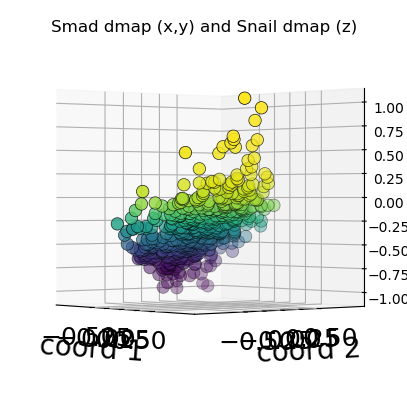

/Users/frick/Dparams/DParamsFinal_v5agnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500/2d-manifolds/expSYST3_PCGENE-caga.png
done


In [21]:
savepath = str(cwd) + '/' + specidpath + '/2d-manifolds/'

if not os.path.exists(savepath):
    os.makedirs(savepath)
    
plt.style.use('default')
# plt.style.use('ggplot')   
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
x = evecs_in[:,ev_in[0]].copy()
y = evecs_in[:,ev_in[1]].copy()
cc = evecs_out[:,ev_out[0]].copy()
z = cc.copy()
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0
# csort = range(len(cc))
xx = x[csort]
yy = y[csort]
zz = z[csort]

xtickvec = np.linspace(-1,1,5)
ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.title('Smad dmap (x,y) and Snail dmap (z)')
# savestr = savepath+' snailC 3d man.png'
savestr = savepath + checkstr1 + checkstr2 + '.png'
plt.savefig(savestr,bbox_inches='tight')
ax.view_init(0,-40)
plt.show()

print(savestr)
print('done')

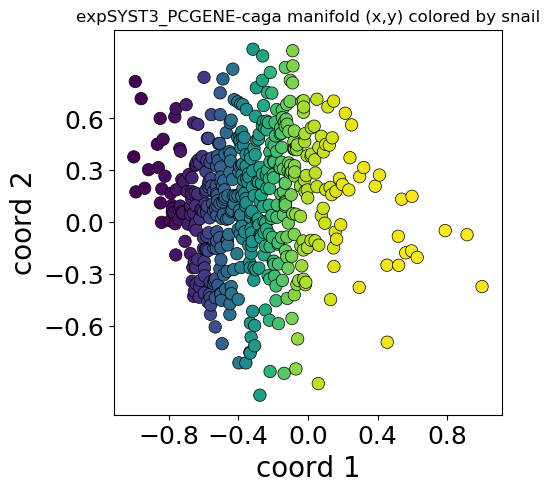

/Users/frick/Dparams/DParamsFinal_v5agnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500/2d-manifolds/expSYST3_PCGENE-caga manifold colored by snail.png
done


In [24]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)


ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.title(checkstr1+checkstr2+' manifold (x,y) colored by snail')

xtickvec= np.linspace(-1.6,1.6,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
xtickvec= np.linspace(-1.2,1.2,5)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+ checkstr1+checkstr2 + ' manifold colored by snail'+'.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

In [ ]:

def plotDMAPcoloredwithOtherDMAPz(evecs_test,ev_test0,c_vec,cv_in,fontsize,lw,msize,fsize,cmap,ss1,ss2):

    import itertools
    eicl = list(itertools.combinations(ev_test0,2))
    cicl = list(itertools.combinations(cv_in,1))

    
    
    wspaceA = 0.5
    hspaceA = 0.5
    fsize[0]=(fsize[0]+wspaceA)*len(eicl)
    fsize[1]=(fsize[1]+hspaceA)*len(cicl)
    fig = plt.figure(figsize=fsize)
    cycle = iter(range(len(eicl)*len(cicl)))
    for i in range(len(eicl)):
        for j in range(len(cicl)):
            ev_test = eicl[i]


            xlabelstr = 'coord 1'
            ylabelstr = 'coord 2'
            titlestr = ss1 +' manifold'
            if len(ev_test)==1:
                x = np.asarray(range(evecs_test.shape[1])).reshape(-1,)
                y = evecs_test[:,ev_test[0]].copy()
                y = np.sort(y)
                x = np.argsort(y)

                cc = np.zeros(y.shape)
                csort = range(0,len(cc))

                xlabelstr = 'cell index'
                ylabelstr = 'coord 1'

            elif len(ev_test)==2:
                x = evecs_test[:,ev_test[0]].copy()
                y = evecs_test[:,ev_test[1]].copy()
                z = c_vec[:,cv_in[j]].copy()
                cc = z
                csort = range(0,len(cc))
                csort = np.argsort(cc)
                cc = range(len(csort))

                
                xv = np.where(np.in1d(ev_test0,ev_test[0]))[0][0] +1
                yv = np.where(np.in1d(ev_test0,ev_test[1]))[0][0] +1
                zv = j +1
                xlabelstr = ss1+ ' coord '+str(xv)
                ylabelstr = ss1+ ' coord '+str(yv)
                titlestr = ss1 +' manifold colored by '+ ss2 +' coord '+str(zv)
                

            elif len(ev_test)>4:
                error('i break')




            xx = x[csort]
            yy = y[csort]

            cy = next(cycle)
            ax = fig.add_subplot(len(cicl),len(eicl),cy+1)
            ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
            plt.xlabel(xlabelstr,fontsize=fontsize)
            plt.ylabel(ylabelstr,fontsize=fontsize)
            plt.title(titlestr,fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)

            fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        
    plt.show()
    
   
    

In [ ]:
fsize=[4,3]
msize = 100
lw=2
cmap = plt.cm.viridis
fontsize = 12
evecs_test = evecs_in.copy()
ev_test = ev_in.copy()
c_vec  = evecs_out.copy()
cv_in = ev_out.copy()
ss1 = 'smad'
ss2 = 'snail'
plotDMAPcoloredwithOtherDMAPz(evecs_test,ev_test,c_vec,cv_in,fontsize,lw,msize,fsize,cmap,ss1,ss2)

In [ ]:
fsize=[4,3]
msize = 100
lw=2
cmap = plt.cm.viridis
fontsize = 12
evecs_test = evecs_out.copy()
ev_test = ev_out.copy()
c_vec  = evecs_in.copy()
cv_in = ev_in.copy()
ss1 = 'snail'
ss2 = 'smad'
plotDMAPcoloredwithOtherDMAPz(evecs_test,ev_test,c_vec,cv_in,fontsize,lw,msize,fsize,cmap,ss1,ss2)

In [ ]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specidpath + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')

In [ ]:
# import dill as pickle;
# from pathlib import Path

# # cwd = Path().resolve()
# # print(cwd)
# # repo = str(cwd) +'/'

# session_savepath = 'session' + conditionid + specid + 'clean/'
# session_path = repo + session_savepath
# session_name = 'sesh'
# savename = session_path + session_name


# pickle.load_session(savename)
# print(ev_in)

# first attempt to use the original DMAPS [1,3] and [1] using GPy

In [ ]:
# ev_in = [1,3]
# ev_out = [1]

In [ ]:
print(ev_in)
print(ev_out)

In [ ]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [ ]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
if len(ev_in)==1:
    X = evecs_in[:,ev_in].reshape(-1,1)


Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

In [ ]:
#can we predict input data well?
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [ ]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)
    x1,y1, mse, mseeach = msefunc(xp,Y)
    msev = np.asarray(list(mseeach.values())).reshape(-1,)
    x1s = x1.shape[1]
    ws = 1
    fig = plt.figure(figsize=((4 + (ws*(x1s-1)))*x1s,4))
    for i in range(0,x1.shape[1]):
        x = x1[:,i]
        y = y1[:,i]
        if x1.shape[1]==1:
            plt.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        else:
            ax = fig.add_subplot(1,x1s,i+1)
            ax.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        if x1.shape[1]>1:
            plt.title('predict ' + outputstr + ' dim-' + str(i+1) + ' based on ' + inputstr)
        else:
            plt.title('predict ' + outputstr + ' based on ' + inputstr)
        ax = plt.gca()
        t = ax.text(0.01,0.99,'rescaled mse = ',transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
        t = ax.text(0.01,0.95,str(np.round(msev[i],5)),transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
    plt.show()
    return mseeach

In [ ]:
def predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2):
    msekeeper={}
    import GPy
    #use Smad Manifold to predicut Smad trajectories (1 timepoint)
    # sample inputs and outputs
    max_f_eval = 1000
    messages=False
    inputstr = ss1 + ' dmaps'
    tvec = time_data[1,:]
    basal = ((np.where(tvec<=0))[0])
    peak = ((np.where(tvec<=30))[0])[-1]

    X=X0.copy()
    outputstr = ss1 + ' tpoint'
    Y = sdat1[:,10].reshape(-1,1) #reshape to look like a 2d input
#     Y = sdat1[:,[5,10,15]]
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss1 + ' max relative rate'
    
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(sdat1[j,:]/np.median(sdat1[j,basal]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' maximum integral'
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(np.cumsum(sdat1[j,:]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' foldchange at tpeak'
    foldchange = sdat1[:,peak]/np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X = X0.copy()
    outputstr = ss1 + ' difference at tpeak'
    foldchange = sdat1[:,peak]-np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss2 + ' difference'
    snaildiff = sdat2[:,peak]-np.median(sdat2[:,basal])
    Y = snaildiff.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss2 + ' dmap'
    Y = X2.copy()
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach
    
    for v in range(X.shape[1]):
        print(v)
#         outputstr = ss2 + ' dmap, using ' +ss1+ ' ' +str(list(range(1,v+2)))
        inputstr0 = ss1 + ' ' + str(list(range(1,v+2)))
        print(inputstr0)
        X=X0.copy()
        Y = X2.copy()
        m = Gpymadness(X[:,0:v+1],Y,messages,max_f_eval,inputstr0,outputstr)
        mseeach = Gpy_mse_plot(m,X,Y,inputstr0,outputstr)
        msekeeper[outputstr]=mseeach
        
    return msekeeper


In [ ]:
#predictions based on Smad
ss1 = 'smad'
ss2 = 'snail'
X = evecs_in[:,ev_in].copy()
X0=X.copy()
sdat1 = ogdin.copy()
sdat2 = ogdout.copy()
X2 = evecs_out[:,ev_out].copy()
msekeepersmad = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

ss1 = 'snail'
ss2 = 'smad'
X = evecs_out[:,ev_out].copy()
X0=X.copy()
sdat1 = ogdout.copy()
sdat2 = ogdin.copy()
X2 = evecs_in[:,ev_in].copy()
msekeepersnail = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

In [ ]:


time_vec = time_data[1,:]
tsample = 3
tsamp = np.min([tsample,len(time_vec)])

print(len(time_vec))

axfact = 5

ax1 = np.ceil(len(time_vec)/2) - np.ceil(len(time_vec)/5)
ax2 = np.ceil(len(time_vec)/2) + np.ceil(len(time_vec)/5)
samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
print(samp_vec)
print(time_vec[samp_vec])


In [ ]:
def make_samp_vec(Yin):
    ltv = Yin.shape[1]
    ax1 = np.ceil(ltv/2) - np.ceil(ltv/5)
    ax2 = np.ceil(ltv/2) + np.ceil(ltv/5)
    samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
    return samp_vec

In [ ]:

def gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2):
    #attempt to predict input data at all timepoints using Smad Dmaps
    msecombo={} #initialize the master msecombo
    max_f_eval = 1000
    messages = False

    ## run each
    outputstr = ss1 + ' at each tpoint'
    Yin = fsmad
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = ss2 + ' at each tpoint'
    Yin = snaildat
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'f('+ss1+')'
    Z = fsmad.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+smallnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
    #     s = np.random.lognormal(mean, sigma, size=fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+mediumnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    
    outputstr = 'f('+ss1+'_processed)'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+s_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+m_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s


    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'noise only'
    Z = fsmad.copy()
    samp_vec = make_samp_vec(Yin)
    mu, sigma = 0, 1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = s

    Yin = Z
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    return msecombo

In [ ]:
# msecombosmad = msecombo.copy()
inputstr = 'smad dmap'
X = evecs_in[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdin.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_in.copy())
snaildat = reducedimensionalityforGPy(ogdout.copy())
ss1 = 'smad'
ss2 = 'snail'
msecombosmad = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


In [ ]:
inputstr = 'snail dmap'
X = evecs_out[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdout.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_out.copy())
snaildat = reducedimensionalityforGPy(ogdin.copy())
ss1 = 'snail'
ss2 = 'smad'
msecombosnail = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


In [ ]:
def msecomboplotter(tvec,msecombo,smadsnail,yl):
    plt.figure(figsize=(5,3))
    subkeep={}
    cycle=0
    for k in msecombo.keys():
        cycle=cycle+1
        v = msecombo[k]
      # k is now the key
      # v is the value
        subkeep[k]=v
        plt.semilogy(tvec+(cycle/100),v,'*-', label=k)
        
    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('time point, value')
    plt.title('error for different predictions based on '+ smadsnail + ' manifold') 
    plt.legend()
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()
        
def msecombomedianplotter(msecombo,smadsnail):
    plt.figure(figsize=(6,3))
    msecombo2 = msecombo.copy()
    cycle=-1
    for k in msecombo.keys():
        y={}
        cycle=cycle+1
        v = msecombo[k]
        y[cycle] = np.median(v)
        msecombo2[k] = y

    cycle=-1
    for k in msecombo2.keys():
        cycle=cycle+1
        v = msecombo2[k]
      # k is now the key
      # v is the value
        y = v.values()
        if len(y)==1:
            x = cycle
            markerstr='o'
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
        plt.semilogy(x,y,markerstr, label=k)
        
            # plt.ylim(0.01,1)
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
    plt.show()
    
    
def msekeeperplotter(msekeeper2,yl,smadsnail):  
    cycle=-1
    plt.figure(figsize=(4,2))
    for k in msekeeper2.keys():
        cycle=cycle+1
        v = msekeeper2[k]
      # k is now the key
      # v is the value
        y = np.asarray(list(v.values())).reshape(-1,)
        if len(y)==1:
            x = cycle
            markerstr='o'
            msize = 7
            if y<yl[0]:
                x = cycle
                markerstr = 'v'
                print('edited value lower than,', yl[0])
                y = yl[0]*2
                msize=7
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
            msize=7
        plt.semilogy(x,y,markerstr, label=k, markersize = msize)

    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()

In [ ]:
yl = [1e-4,5]
smadsnail='smad'
msekeeperplotter(msekeepersmad,yl,smadsnail)
smadsnail='snail'
msekeeperplotter(msekeepersnail,yl,smadsnail)
   

In [ ]:


samp_vec = make_samp_vec(time_data_in)
tvec = time_data_in[1,:]
smadsnail = 'smad'
msecomboplotter(tvec[samp_vec]/60,msecombosmad,smadsnail,yl)
smadsnail = 'snail'
msecomboplotter(tvec[samp_vec]/60,msecombosnail,smadsnail,yl)

In [ ]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specidpath + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshyAfterGPy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')